* Explore the dataset - EDA
* Wrangle dataset - Cleaning dataset
* Build a regression model to predict insurance price
* Model interpretation
* Create amazing visualization using plotly, seaborn, tableau
* Deploy project using flask and/or plotly using Heroku

In [2]:
import pandas as pd

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/EvidenceN/Insurance_premium_prediction/master/data/auto_insurance_data.csv")

In [3]:
pd.options.display.max_columns = 999

In [4]:
insurance.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
insurance.shape

(9134, 24)

In [6]:
# from pandas_profiling import ProfileReport

In [7]:
#profile = ProfileReport(insurance)

In [8]:
#profile

# Things to do and check out -- Data WRANGLING steps to complete
## Regression problem - 2 Models for 2 targets.
**one target = predicting insurance premium** 

**second target = predicting customer lifetime value**
### Find the meaning of column names

* [x] Profile report says no date column - Wrong, convert date column to date. Convert Effective_to_date to dates
* [x] Drop customer column because it doesn't matter
* [x] Encode Coverage column - categorical to integer
* [] Target column for prediction - Customer lifetime value. 
* [] Mean baseline for lifetime value = 8004.940475
* [] Mean baseline for monthly premium = 93.2192905
* [] Change customer lifetime value to 2 significant figures
* [] Change monthly premium to 2 significant figures
* [] Look at correlation between monthly premium and customer lifetime value
* [] Encode education column into categorical
* [x] change effective_to_date from object to date
* [] Change employment status into numbers
* [] Change gender into numbers
* [] Change location_code into integer
* [] Change marital status into integer
* [] Explore relationship between month since last claim and insurance premium
* [] Look at relationship between month since last claim, and premium price
* [] Look at relationship between month since policy inception, and premium price
* [] Look at relationship between number of complaints and premium price
* [] Look at relationship between number of policy and premium price
* [] Type of policy needs to be converted into integers
* [] Drop renew_offer type because we don't know what offer1, offer2, offer3 means in this dataset. 
* [] drop `response` column because we don't know what "Response" means. Response to what? What was the original question they are responding to?
* [] change sales_channel to integer
* [] change state to integers - encoding
* [] look at relationship between state and insurance premium and life time value
* [] explore relationship between total claim amount and insurance premium
* [] encode vehicle class and 
* [] explore relationship between vehicle class and insurance premium and also lifetime value
* [] Explore vehicle class and number of policy. 
* [] Explore vehicle class and gender. 
* [] Explore vehicle class and vehicle size status. 
* [] Explore vehicle size and insurance premium status. 
* [] Explore vehicle size and lifetime value status. 
* [] Encode vehicle size into integer

Marked checkbox unicode  - &#x2611;
Marked checkbox unicode  - &#9745;

In [9]:
insurance.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [10]:
# Convert Effective_To_Date from categorical to date
# Effective_to_date could mean the day insurance starts or could be interpreted
# as the day insurance ends. As in effective until this date. 

insurance["activation_date"] = pd.to_datetime(insurance["Effective To Date"], infer_datetime_format = True)

In [11]:
insurance.dtypes

Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                        object
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

In [12]:
insurance.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,activation_date
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011-02-24
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011-01-31
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011-02-19
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011-01-20
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011-02-03


In [13]:
insurance = insurance.drop(columns = ["Customer", "Effective To Date"])

In [14]:
insurance.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,activation_date
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011-02-24
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011-01-31
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011-02-19
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011-01-20
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011-02-03


In [15]:
# split data into train, test, validation dataset before proceeding. 
# should have done this before chaging to datetime and dropping columns. 

from sklearn.model_selection import train_test_split

train, test = train_test_split(insurance, train_size = 0.85, test_size=0.15, random_state=42)

# validation dataset

train, val = train_test_split(train, train_size = 0.85, test_size=0.15, random_state=42)

In [16]:
train.shape

(6598, 23)

In [17]:
test.shape

(1371, 23)

In [18]:
val.shape

(1165, 23)

In [19]:
#encode coverage column from categorical to integer

insurance['Coverage'].describe()

count      9134
unique        3
top       Basic
freq       5568
Name: Coverage, dtype: object

In [20]:
insurance['Coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

In [21]:
#[{‘col’: ‘col1’, ‘mapping’: {None: 0, ‘a’: 1, ‘b’: 2}}] correct mapping structure for ordinal encoding

coverage_dictionary = [{'col': 'Coverage','mapping':{"Basic":1, "Extended":2, "Premium": 3}}]

In [22]:
# use ordinal encoding to do encode coverage column

import category_encoders as ce

coverage_encoder = ce.OrdinalEncoder(cols="Coverage", mapping=coverage_dictionary)

In [23]:
train_encoded = coverage_encoder.fit_transform(train)
test_encoded = coverage_encoder.transform(test)

In [24]:
train_encoded.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,activation_date
5249,Arizona,4786.889347,No,1,College,Employed,M,45515,Urban,Married,61,14,33,0,9,Personal Auto,Personal L3,Offer2,Call Center,236.907007,Two-Door Car,Large,2011-01-02
2077,Arizona,8838.085637,Yes,1,Bachelor,Employed,M,82664,Rural,Married,114,24,10,3,9,Corporate Auto,Corporate L3,Offer2,Agent,133.425609,SUV,Medsize,2011-01-21
6357,Oregon,11638.899470,Yes,1,College,Medical Leave,F,25370,Suburban,Married,102,10,77,0,2,Personal Auto,Personal L3,Offer1,Branch,489.600000,Sports Car,Large,2011-01-26
8128,California,4670.953723,No,1,College,Unemployed,F,0,Urban,Divorced,64,25,89,0,4,Corporate Auto,Corporate L2,Offer2,Call Center,181.810486,Four-Door Car,Medsize,2011-02-15
6787,Arizona,2352.367900,No,1,College,Unemployed,F,0,Suburban,Divorced,64,4,61,0,1,Corporate Auto,Corporate L2,Offer1,Branch,381.062306,Four-Door Car,Medsize,2011-01-19


In [25]:
train_encoded['Coverage'].describe()

count    6598.000000
mean        1.475447
std         0.651431
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: Coverage, dtype: float64

In [26]:
train['Coverage'].value_counts()

Basic       4038
Extended    1983
Premium      577
Name: Coverage, dtype: int64

In [27]:
train_encoded['Coverage'].value_counts()

1    4038
2    1983
3     577
Name: Coverage, dtype: int64

In [28]:
test['Coverage'].value_counts()

Basic       826
Extended    421
Premium     124
Name: Coverage, dtype: int64

In [29]:
test_encoded['Coverage'].value_counts()

1    826
2    421
3    124
Name: Coverage, dtype: int64

In [30]:
# encode education from categorical value to integers

train["Education"].describe()

count         6598
unique           5
top       Bachelor
freq          1992
Name: Education, dtype: object

In [31]:
train["Education"].value_counts()

Bachelor                1992
College                 1926
High School or Below    1898
Master                   521
Doctor                   261
Name: Education, dtype: int64

In [32]:
# combine college and bachelor into one datatype. Could be that
# college means people that went to college but didn't graduate
# Combine college and bachelor for clarification and easier assessment

train['Education'] = train['Education'].replace({"College":"Bachelor"})

In [33]:
train["Education"].value_counts()

Bachelor                3918
High School or Below    1898
Master                   521
Doctor                   261
Name: Education, dtype: int64

In [34]:
test['Education'] = test['Education'].replace({"College":"Bachelor"});

C:\Users\Samsung\.virtualenvs\Insurance_premium_prediction-3bd2BkMd\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
test["Education"].value_counts()

Bachelor                806
High School or Below    398
Master                  125
Doctor                   42
Name: Education, dtype: int64

In [36]:
# encoding education column from categorical into integers

education_dictionary = [{'col': 'Education','mapping':{"High School or Below":1, 
                                                       "Bachelor":2, "Master": 3,
                                                      "Doctor": 4}}]

education_encoder = ce.OrdinalEncoder(cols="Education", mapping=education_dictionary)


train_encoded['Education'] = train_encoded['Education'].replace({"College":"Bachelor"})
test_encoded['Education'] = test_encoded['Education'].replace({"College":"Bachelor"})

train_encoded = education_encoder.fit_transform(train_encoded)
test_encoded = education_encoder.transform(test_encoded)

In [37]:
train_encoded['Education'].value_counts()

2    3918
1    1898
3     521
4     261
Name: Education, dtype: int64

In [38]:
train_encoded.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'activation_date'],
      dtype='object')

In [39]:
# rounding various series in our dataframe. 
# columns to round - lifetime value, monthly premium, total claim amount

train_encoded = train_encoded.round({"Customer Lifetime Value": 2, "Total Claim Amount": 2})
test_encoded = test_encoded.round({"Customer Lifetime Value": 2, "Total Claim Amount": 2})
train = train.round({"Customer Lifetime Value": 2, "Total Claim Amount": 2})
test = test.round({"Customer Lifetime Value": 2, "Total Claim Amount": 2})

In [40]:
train_encoded.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,activation_date
5249,Arizona,4786.89,No,1,2,Employed,M,45515,Urban,Married,61,14,33,0,9,Personal Auto,Personal L3,Offer2,Call Center,236.91,Two-Door Car,Large,2011-01-02
2077,Arizona,8838.09,Yes,1,2,Employed,M,82664,Rural,Married,114,24,10,3,9,Corporate Auto,Corporate L3,Offer2,Agent,133.43,SUV,Medsize,2011-01-21
6357,Oregon,11638.90,Yes,1,2,Medical Leave,F,25370,Suburban,Married,102,10,77,0,2,Personal Auto,Personal L3,Offer1,Branch,489.60,Sports Car,Large,2011-01-26
8128,California,4670.95,No,1,2,Unemployed,F,0,Urban,Divorced,64,25,89,0,4,Corporate Auto,Corporate L2,Offer2,Call Center,181.81,Four-Door Car,Medsize,2011-02-15
6787,Arizona,2352.37,No,1,2,Unemployed,F,0,Suburban,Divorced,64,4,61,0,1,Corporate Auto,Corporate L2,Offer1,Branch,381.06,Four-Door Car,Medsize,2011-01-19


# Things to do and check out -- Data WRANGLING steps to complete
## Regression problem - 2 Models for 2 targets.
**one target = predicting insurance premium** 

**second target = predicting customer lifetime value**
### Find the meaning of column names

* [x] Profile report says no date column - Wrong, convert date column to date. Convert Effective_to_date to dates
* [x] Drop customer column because it doesn't matter
* [x] Encode Coverage column - categorical to integer
* [] Target column for prediction - Customer lifetime value. 
* [] Mean baseline for lifetime value = 8004.940475
* [] Mean baseline for monthly premium = 93.2192905
* [x] Change customer lifetime value to 2 significant figures
* [x] Change total claim amount to 2 significant figures
* [] Look at correlation between monthly premium and customer lifetime value
* [x] Encode education column into categorical
* [x] change effective_to_date from object to date
* [x] Change employment status into numbers
* [x] Change gender into numbers
* [x] Change location_code into integer
* [] Change marital status into integer
* [] Explore relationship between month since last claim and insurance premium
* [] Look at relationship between month since last claim, and premium price
* [] Look at relationship between month since policy inception, and premium price
* [] Look at relationship between number of complaints and premium price
* [] Look at relationship between number of policy and premium price
* [] Type of policy needs to be converted into integers
* [] Drop renew_offer type because we don't know what offer1, offer2, offer3 means in this dataset. 
* [] drop `response` column because we don't know what "Response" means. Response to what? What was the original question they are responding to?
* [] change sales_channel to integer
* [] change state to integers - encoding
* [] look at relationship between state and insurance premium and life time value
* [] explore relationship between total claim amount and insurance premium
* [] encode vehicle class and 
* [] explore relationship between vehicle class and insurance premium and also lifetime value
* [] Explore vehicle class and number of policy. 
* [] Explore vehicle class and gender. 
* [] Explore vehicle class and vehicle size status. 
* [] Explore vehicle size and insurance premium status. 
* [] Explore vehicle size and lifetime value status. 
* [] Encode vehicle size into integer

Week 3 of project. Starting with encoding employment status

What type of encoding. Does order matter in this encoding. 

Start by using one hot encoding and then in the future

**COME BACK AND TRY OUT TARGET ENCODING TO SEE 
EFFECTS ON MODEL**. 

In [41]:
train_encoded["EmploymentStatus"].describe()

count         6598
unique           5
top       Employed
freq          4095
Name: EmploymentStatus, dtype: object

In [42]:
train_encoded["EmploymentStatus"].value_counts()

Employed         4095
Unemployed       1674
Medical Leave     323
Disabled          297
Retired           209
Name: EmploymentStatus, dtype: int64

Train, Test = RAW UNMANIPULATED DATA

**and**

Train_encoded, test_encoded is MANIPULATED DATAFRAME

In [43]:
# Encode employment status column with one hot encoding
# experiment with target encoding later. 
# order doesn't matter in this column situation

employment_encoder = ce.OneHotEncoder(cols = "EmploymentStatus", use_cat_names=True)

train_encoded = employment_encoder.fit_transform(train_encoded)
test_encoded = employment_encoder.transform(test_encoded)

In [44]:
train_encoded.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Unemployed,EmploymentStatus_Disabled,EmploymentStatus_Retired,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,activation_date
5249,Arizona,4786.89,No,1,2,1,0,0,0,0,M,45515,Urban,Married,61,14,33,0,9,Personal Auto,Personal L3,Offer2,Call Center,236.91,Two-Door Car,Large,2011-01-02
2077,Arizona,8838.09,Yes,1,2,1,0,0,0,0,M,82664,Rural,Married,114,24,10,3,9,Corporate Auto,Corporate L3,Offer2,Agent,133.43,SUV,Medsize,2011-01-21
6357,Oregon,11638.90,Yes,1,2,0,1,0,0,0,F,25370,Suburban,Married,102,10,77,0,2,Personal Auto,Personal L3,Offer1,Branch,489.60,Sports Car,Large,2011-01-26
8128,California,4670.95,No,1,2,0,0,1,0,0,F,0,Urban,Divorced,64,25,89,0,4,Corporate Auto,Corporate L2,Offer2,Call Center,181.81,Four-Door Car,Medsize,2011-02-15
6787,Arizona,2352.37,No,1,2,0,0,1,0,0,F,0,Suburban,Divorced,64,4,61,0,1,Corporate Auto,Corporate L2,Offer1,Branch,381.06,Four-Door Car,Medsize,2011-01-19


In [45]:
test_encoded.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Unemployed,EmploymentStatus_Disabled,EmploymentStatus_Retired,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,activation_date
708,California,4222.63,No,1,1,1,0,0,0,0,M,74585,Rural,Married,106,1,49,0,1,Personal Auto,Personal L3,Offer2,Agent,218.60,SUV,Medsize,2011-01-17
47,Oregon,5514.34,No,1,1,1,0,0,0,0,F,23218,Suburban,Single,71,7,10,0,4,Personal Auto,Personal L2,Offer4,Agent,447.79,Two-Door Car,Medsize,2011-01-02
3995,Oregon,3808.12,Yes,2,2,1,0,0,0,0,F,94903,Suburban,Married,94,3,38,0,1,Personal Auto,Personal L3,Offer2,Agent,451.20,Two-Door Car,Small,2011-01-28
1513,California,7914.82,No,2,2,1,0,0,0,0,F,77153,Urban,Married,99,3,27,1,5,Personal Auto,Personal L3,Offer1,Branch,355.64,Four-Door Car,Medsize,2011-02-09
3686,Washington,7931.72,No,1,1,0,0,0,1,0,F,23769,Suburban,Divorced,69,18,14,0,2,Personal Auto,Personal L2,Offer1,Branch,470.10,Four-Door Car,Medsize,2011-02-20


In [46]:
# changing employement status column names on train dataset

train_encoded = train_encoded.rename(columns = {"EmploymentStatus_Employed": "Employed", "EmploymentStatus_Unemployed": "Unemployed",
                                      "EmploymentStatus_Disabled": "Disabled", "EmploymentStatus_Retired": "Retired",
                                      "EmploymentStatus_Medical Leave": "Medical_Leave"})

In [47]:
train_encoded.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Employed,Medical_Leave,Unemployed,Disabled,Retired,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,activation_date
5249,Arizona,4786.89,No,1,2,1,0,0,0,0,M,45515,Urban,Married,61,14,33,0,9,Personal Auto,Personal L3,Offer2,Call Center,236.91,Two-Door Car,Large,2011-01-02
2077,Arizona,8838.09,Yes,1,2,1,0,0,0,0,M,82664,Rural,Married,114,24,10,3,9,Corporate Auto,Corporate L3,Offer2,Agent,133.43,SUV,Medsize,2011-01-21
6357,Oregon,11638.90,Yes,1,2,0,1,0,0,0,F,25370,Suburban,Married,102,10,77,0,2,Personal Auto,Personal L3,Offer1,Branch,489.60,Sports Car,Large,2011-01-26
8128,California,4670.95,No,1,2,0,0,1,0,0,F,0,Urban,Divorced,64,25,89,0,4,Corporate Auto,Corporate L2,Offer2,Call Center,181.81,Four-Door Car,Medsize,2011-02-15
6787,Arizona,2352.37,No,1,2,0,0,1,0,0,F,0,Suburban,Divorced,64,4,61,0,1,Corporate Auto,Corporate L2,Offer1,Branch,381.06,Four-Door Car,Medsize,2011-01-19


In [48]:
# changing employement status column names on test dataset

test_encoded = test_encoded.rename(columns = {"EmploymentStatus_Employed": "Employed", "EmploymentStatus_Unemployed": "Unemployed",
                                      "EmploymentStatus_Disabled": "Disabled", "EmploymentStatus_Retired": "Retired",
                                      "EmploymentStatus_Medical Leave": "Medical_Leave"})

In [49]:
# encode gender to be numerical. 

train['Gender'].value_counts()

F    3377
M    3221
Name: Gender, dtype: int64

In [50]:
# Encode gender column with one hot encoding
# order doesn't matter in this column situation

gender_encoder = ce.OneHotEncoder(cols = "Gender", use_cat_names=True)

train_encoded = gender_encoder.fit_transform(train_encoded)
test_encoded = gender_encoder.transform(test_encoded)

In [51]:
train_encoded.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Employed,Medical_Leave,Unemployed,Disabled,Retired,Gender_M,Gender_F,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,activation_date
5249,Arizona,4786.89,No,1,2,1,0,0,0,0,1,0,45515,Urban,Married,61,14,33,0,9,Personal Auto,Personal L3,Offer2,Call Center,236.91,Two-Door Car,Large,2011-01-02
2077,Arizona,8838.09,Yes,1,2,1,0,0,0,0,1,0,82664,Rural,Married,114,24,10,3,9,Corporate Auto,Corporate L3,Offer2,Agent,133.43,SUV,Medsize,2011-01-21
6357,Oregon,11638.90,Yes,1,2,0,1,0,0,0,0,1,25370,Suburban,Married,102,10,77,0,2,Personal Auto,Personal L3,Offer1,Branch,489.60,Sports Car,Large,2011-01-26
8128,California,4670.95,No,1,2,0,0,1,0,0,0,1,0,Urban,Divorced,64,25,89,0,4,Corporate Auto,Corporate L2,Offer2,Call Center,181.81,Four-Door Car,Medsize,2011-02-15
6787,Arizona,2352.37,No,1,2,0,0,1,0,0,0,1,0,Suburban,Divorced,64,4,61,0,1,Corporate Auto,Corporate L2,Offer1,Branch,381.06,Four-Door Car,Medsize,2011-01-19


In [52]:
# change gender column names on train and test dataset. 

train_encoded = train_encoded.rename(columns = {"Gender_M": "Male", "Gender_F": "Female"})
test_encoded = test_encoded.rename(columns = {"Gender_M": "Male", "Gender_F": "Female"})

In [53]:
train_encoded.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Employed,Medical_Leave,Unemployed,Disabled,Retired,Male,Female,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,activation_date
5249,Arizona,4786.89,No,1,2,1,0,0,0,0,1,0,45515,Urban,Married,61,14,33,0,9,Personal Auto,Personal L3,Offer2,Call Center,236.91,Two-Door Car,Large,2011-01-02
2077,Arizona,8838.09,Yes,1,2,1,0,0,0,0,1,0,82664,Rural,Married,114,24,10,3,9,Corporate Auto,Corporate L3,Offer2,Agent,133.43,SUV,Medsize,2011-01-21
6357,Oregon,11638.90,Yes,1,2,0,1,0,0,0,0,1,25370,Suburban,Married,102,10,77,0,2,Personal Auto,Personal L3,Offer1,Branch,489.60,Sports Car,Large,2011-01-26
8128,California,4670.95,No,1,2,0,0,1,0,0,0,1,0,Urban,Divorced,64,25,89,0,4,Corporate Auto,Corporate L2,Offer2,Call Center,181.81,Four-Door Car,Medsize,2011-02-15
6787,Arizona,2352.37,No,1,2,0,0,1,0,0,0,1,0,Suburban,Divorced,64,4,61,0,1,Corporate Auto,Corporate L2,Offer1,Branch,381.06,Four-Door Car,Medsize,2011-01-19


In [54]:
train["Location Code"].describe()

count         6598
unique           3
top       Suburban
freq          4190
Name: Location Code, dtype: object

In [55]:
train["Location Code"].value_counts()

Suburban    4190
Rural       1268
Urban       1140
Name: Location Code, dtype: int64

In [56]:
# Encode location code column with one hot encoding
# order doesn't matter in this column situation

location_encoder = ce.OneHotEncoder(cols = "Location Code", use_cat_names=True)

train_encoded = location_encoder.fit_transform(train_encoded)
test_encoded = location_encoder.transform(test_encoded)

In [57]:
train_encoded.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Employed,Medical_Leave,Unemployed,Disabled,Retired,Male,Female,Income,Location Code_Urban,Location Code_Rural,Location Code_Suburban,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,activation_date
5249,Arizona,4786.89,No,1,2,1,0,0,0,0,1,0,45515,1,0,0,Married,61,14,33,0,9,Personal Auto,Personal L3,Offer2,Call Center,236.91,Two-Door Car,Large,2011-01-02
2077,Arizona,8838.09,Yes,1,2,1,0,0,0,0,1,0,82664,0,1,0,Married,114,24,10,3,9,Corporate Auto,Corporate L3,Offer2,Agent,133.43,SUV,Medsize,2011-01-21
6357,Oregon,11638.90,Yes,1,2,0,1,0,0,0,0,1,25370,0,0,1,Married,102,10,77,0,2,Personal Auto,Personal L3,Offer1,Branch,489.60,Sports Car,Large,2011-01-26
8128,California,4670.95,No,1,2,0,0,1,0,0,0,1,0,1,0,0,Divorced,64,25,89,0,4,Corporate Auto,Corporate L2,Offer2,Call Center,181.81,Four-Door Car,Medsize,2011-02-15
6787,Arizona,2352.37,No,1,2,0,0,1,0,0,0,1,0,0,0,1,Divorced,64,4,61,0,1,Corporate Auto,Corporate L2,Offer1,Branch,381.06,Four-Door Car,Medsize,2011-01-19


In [58]:
# change location code column names on train and test dataset. 

train_encoded = train_encoded.rename(columns = {"Location Code_Urban": "Urban", "Location Code_Rural": "Rural", 
                                                "Location Code_Suburban":"Suburban"})
test_encoded = test_encoded.rename(columns = {"Location Code_Urban": "Urban", "Location Code_Rural": "Rural", 
                                                "Location Code_Suburban":"Suburban"})

In [59]:
train_encoded.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Employed,Medical_Leave,Unemployed,Disabled,Retired,Male,Female,Income,Urban,Rural,Suburban,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,activation_date
5249,Arizona,4786.89,No,1,2,1,0,0,0,0,1,0,45515,1,0,0,Married,61,14,33,0,9,Personal Auto,Personal L3,Offer2,Call Center,236.91,Two-Door Car,Large,2011-01-02
2077,Arizona,8838.09,Yes,1,2,1,0,0,0,0,1,0,82664,0,1,0,Married,114,24,10,3,9,Corporate Auto,Corporate L3,Offer2,Agent,133.43,SUV,Medsize,2011-01-21
6357,Oregon,11638.90,Yes,1,2,0,1,0,0,0,0,1,25370,0,0,1,Married,102,10,77,0,2,Personal Auto,Personal L3,Offer1,Branch,489.60,Sports Car,Large,2011-01-26
8128,California,4670.95,No,1,2,0,0,1,0,0,0,1,0,1,0,0,Divorced,64,25,89,0,4,Corporate Auto,Corporate L2,Offer2,Call Center,181.81,Four-Door Car,Medsize,2011-02-15
6787,Arizona,2352.37,No,1,2,0,0,1,0,0,0,1,0,0,0,1,Divorced,64,4,61,0,1,Corporate Auto,Corporate L2,Offer1,Branch,381.06,Four-Door Car,Medsize,2011-01-19


In [60]:
# change to integer these columns 

# marital status, sales_channel, state, vehicle size, type of policy, vehicle class, 
# 

In [61]:
train['Vehicle Size'].value_counts()

Medsize    4672
Small      1246
Large       680
Name: Vehicle Size, dtype: int64

In [62]:
train['Policy'].describe()

count            6598
unique              9
top       Personal L3
freq             2494
Name: Policy, dtype: object

In [63]:
# policy could have an order, but that order could also introduce bias, so, 
# one hot encoding was used for policy. 

# one hot encoding columns
columns_to_encode = ["Marital Status", "Policy Type", "Policy", "Sales Channel", "Vehicle Class"]

# ordinal encoding columns
vehicle_size_encoding = "Vehicle Size"

In [64]:
# encoding vehicle column from categorical into integers using ordinal encoding because
# large, medium, small indicates a natural order. 

vehicle_dictionary = [{'col': 'Vehicle Size','mapping':{"Small":1, 
                                                       "Medsize":2, "Large": 3}}]

vehicle_encoder = ce.OrdinalEncoder(cols="Vehicle Size", mapping=vehicle_dictionary)

train_encoded = vehicle_encoder.fit_transform(train_encoded)
test_encoded = vehicle_encoder.transform(test_encoded)

In [65]:
train_encoded.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Employed,Medical_Leave,Unemployed,Disabled,Retired,Male,Female,Income,Urban,Rural,Suburban,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,activation_date
5249,Arizona,4786.89,No,1,2,1,0,0,0,0,1,0,45515,1,0,0,Married,61,14,33,0,9,Personal Auto,Personal L3,Offer2,Call Center,236.91,Two-Door Car,3,2011-01-02
2077,Arizona,8838.09,Yes,1,2,1,0,0,0,0,1,0,82664,0,1,0,Married,114,24,10,3,9,Corporate Auto,Corporate L3,Offer2,Agent,133.43,SUV,2,2011-01-21
6357,Oregon,11638.90,Yes,1,2,0,1,0,0,0,0,1,25370,0,0,1,Married,102,10,77,0,2,Personal Auto,Personal L3,Offer1,Branch,489.60,Sports Car,3,2011-01-26
8128,California,4670.95,No,1,2,0,0,1,0,0,0,1,0,1,0,0,Divorced,64,25,89,0,4,Corporate Auto,Corporate L2,Offer2,Call Center,181.81,Four-Door Car,2,2011-02-15
6787,Arizona,2352.37,No,1,2,0,0,1,0,0,0,1,0,0,0,1,Divorced,64,4,61,0,1,Corporate Auto,Corporate L2,Offer1,Branch,381.06,Four-Door Car,2,2011-01-19


In [66]:
# encode the remainder of columns using one hot encoder. 

columns_to_encode = ["Marital Status", "Policy Type", "Policy", "Sales Channel", "Vehicle Class"]

# Encode columns above with one hot encoding
# order doesn't matter in this columns situation

columns_encoder = ce.OneHotEncoder(cols = columns_to_encode, use_cat_names=True)

train_encoded = columns_encoder.fit_transform(train_encoded)
test_encoded = columns_encoder.transform(test_encoded)


In [67]:
train_encoded.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Employed,Medical_Leave,Unemployed,Disabled,Retired,Male,Female,Income,Urban,Rural,Suburban,Marital Status_Married,Marital Status_Divorced,Marital Status_Single,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type_Personal Auto,Policy Type_Corporate Auto,Policy Type_Special Auto,Policy_Personal L3,Policy_Corporate L3,Policy_Corporate L2,Policy_Corporate L1,Policy_Personal L2,Policy_Special L3,Policy_Personal L1,Policy_Special L2,Policy_Special L1,Renew Offer Type,Sales Channel_Call Center,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Web,Total Claim Amount,Vehicle Class_Two-Door Car,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Four-Door Car,Vehicle Class_Luxury SUV,Vehicle Class_Luxury Car,Vehicle Size,activation_date
5249,Arizona,4786.89,No,1,2,1,0,0,0,0,1,0,45515,1,0,0,1,0,0,61,14,33,0,9,1,0,0,1,0,0,0,0,0,0,0,0,Offer2,1,0,0,0,236.91,1,0,0,0,0,0,3,2011-01-02
2077,Arizona,8838.09,Yes,1,2,1,0,0,0,0,1,0,82664,0,1,0,1,0,0,114,24,10,3,9,0,1,0,0,1,0,0,0,0,0,0,0,Offer2,0,1,0,0,133.43,0,1,0,0,0,0,2,2011-01-21
6357,Oregon,11638.90,Yes,1,2,0,1,0,0,0,0,1,25370,0,0,1,1,0,0,102,10,77,0,2,1,0,0,1,0,0,0,0,0,0,0,0,Offer1,0,0,1,0,489.60,0,0,1,0,0,0,3,2011-01-26
8128,California,4670.95,No,1,2,0,0,1,0,0,0,1,0,1,0,0,0,1,0,64,25,89,0,4,0,1,0,0,0,1,0,0,0,0,0,0,Offer2,1,0,0,0,181.81,0,0,0,1,0,0,2,2011-02-15
6787,Arizona,2352.37,No,1,2,0,0,1,0,0,0,1,0,0,0,1,0,1,0,64,4,61,0,1,0,1,0,0,0,1,0,0,0,0,0,0,Offer1,0,0,1,0,381.06,0,0,0,1,0,0,2,2011-01-19


In [68]:
# drop 

# Things to do and check out -- Data WRANGLING steps to complete
## Regression problem - 2 Models for 2 targets.
**one target = predicting insurance premium** 

**second target = predicting customer lifetime value**
### Find the meaning of column names

* [x] Profile report says no date column - Wrong, convert date column to date. Convert Effective_to_date to dates
* [x] Drop customer column because it doesn't matter
* [x] Encode Coverage column - categorical to integer
* [] Target column for prediction - Customer lifetime value. 
* [] Mean baseline for lifetime value = 8004.940475
* [] Mean baseline for monthly premium = 93.2192905
* [x] Change customer lifetime value to 2 significant figures
* [x] Change total claim amount to 2 significant figures
* [] Look at correlation between monthly premium and customer lifetime value
* [x] Encode education column into categorical
* [x] change effective_to_date from object to date
* [x] Change employment status into numbers
* [x] Change gender into numbers
* [x] Change location_code into integer
* [x] Change marital status into integer
* [] Explore relationship between month since last claim and insurance premium
* [] Look at relationship between month since last claim, and premium price
* [] Look at relationship between month since policy inception, and premium price
* [] Look at relationship between number of complaints and premium price
* [] Look at relationship between number of policy and premium price
* [x] Type of policy needs to be converted into integers
* [] Drop renew_offer type because we don't know what offer1, offer2, offer3 means in this dataset. What type of policy is offer 1? at what price tag? We don't know that information. So, it makes offer 1-3 irrelevant. 
* [] drop `response` column because we don't know what "Response" means. Response to what? What was the original question they are responding to?
* [x] change sales_channel to integer
* [] change state to integers - encoding
* [] look at relationship between state and insurance premium and life time value
* [] explore relationship between total claim amount and insurance premium
* [x] encode vehicle class and 
* [] explore relationship between vehicle class and insurance premium and also lifetime value
* [] Explore vehicle class and number of policy. 
* [] Explore vehicle class and gender. 
* [] Explore vehicle class and vehicle size status. 
* [] Explore vehicle size and insurance premium status. 
* [] Explore vehicle size and lifetime value status. 
* [x] Encode vehicle size into integer

Work left to do
* [] Target column for prediction - Customer lifetime value. 
* [] Mean baseline for lifetime value = 8004.940475
* [] Mean baseline for monthly premium = 93.2192905
* [] Drop renew_offer type because we don't know what offer1, offer2, offer3 means in this dataset. What type of policy is offer 1? at what price tag? We don't know that information. So, it makes offer 1-3 irrelevant. 
* [] drop `response` column because we don't know what "Response" means. Response to what? What was the original question they are responding to?
* [] change state to integers - encoding
* [] Explore relationship between month since last claim and insurance premium
* [] Look at relationship between month since last claim, and premium price
* [] Look at relationship between month since policy inception, and premium price
* [] Look at relationship between number of complaints and premium price
* [] Look at relationship between number of policy and premium price
* [] look at relationship between state and insurance premium and life time value
* [] explore relationship between total claim amount and insurance premium
* [] explore relationship between vehicle class and insurance premium and also lifetime value
* [] Explore vehicle class and number of policy. 
* [] Explore vehicle class and gender. 
* [] Explore vehicle class and vehicle size status. 
* [] Explore vehicle size and insurance premium status. 
* [] Explore vehicle size and lifetime value status. 

In [69]:
# encode state using One Hot Encoding encoding without specifying order. 
# come back and experiment with different encoding later. 

state_encoder = ce.OneHotEncoder(cols="State", use_cat_names=True)

train_encoded = state_encoder.fit_transform(train_encoded)
test_encoded = state_encoder.transform(test_encoded)


In [70]:
train['State'].describe()

count           6598
unique             5
top       California
freq            2274
Name: State, dtype: object

In [71]:
train_encoded.head()

,State_Arizona,State_Oregon,State_California,State_Nevada,State_Washington,Customer Lifetime Value,Response,Coverage,Education,Employed,Medical_Leave,Unemployed,Disabled,Retired,Male,Female,Income,Urban,Rural,Suburban,Marital Status_Married,Marital Status_Divorced,Marital Status_Single,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type_Personal Auto,Policy Type_Corporate Auto,Policy Type_Special Auto,Policy_Personal L3,Policy_Corporate L3,Policy_Corporate L2,Policy_Corporate L1,Policy_Personal L2,Policy_Special L3,Policy_Personal L1,Policy_Special L2,Policy_Special L1,Renew Offer Type,Sales Channel_Call Center,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Web,Total Claim Amount,Vehicle Class_Two-Door Car,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Four-Door Car,Vehicle Class_Luxury SUV,Vehicle Class_Luxury Car,Vehicle Size,activation_date
5249,1,0,0,0,0,4786.89,No,1,2,1,0,0,0,0,1,0,45515,1,0,0,1,0,0,61,14,33,0,9,1,0,0,1,0,0,0,0,0,0,0,0,Offer2,1,0,0,0,236.91,1,0,0,0,0,0,3,2011-01-02
2077,1,0,0,0,0,8838.09,Yes,1,2,1,0,0,0,0,1,0,82664,0,1,0,1,0,0,114,24,10,3,9,0,1,0,0,1,0,0,0,0,0,0,0,Offer2,0,1,0,0,133.43,0,1,0,0,0,0,2,2011-01-21
6357,0,1,0,0,0,11638.90,Yes,1,2,0,1,0,0,0,0,1,25370,0,0,1,1,0,0,102,10,77,0,2,1,0,0,1,0,0,0,0,0,0,0,0,Offer1,0,0,1,0,489.60,0,0,1,0,0,0,3,2011-01-26
8128,0,0,1,0,0,4670.95,No,1,2,0,0,1,0,0,0,1,0,1,0,0,0,1,0,64,25,89,0,4,0,1,0,0,0,1,0,0,0,0,0,0,Offer2,1,0,0,0,181.81,0,0,0,1,0,0,2,2011-02-15
6787,1,0,0,0,0,2352.37,No,1,2,0,0,1,0,0,0,1,0,0,0,1,0,1,0,64,4,61,0,1,0,1,0,0,0,1,0,0,0,0,0,0,Offer1,0,0,1,0,381.06,0,0,0,1,0,0,2,2011-01-19


In [72]:
# drop response and Renew Offer Type columns for reasons listed above

train_encoded = train_encoded.drop(columns=["Response", "Renew Offer Type"])
test_encoded = test_encoded.drop(columns=["Response", "Renew Offer Type"])

In [73]:
train_encoded.head()

,State_Arizona,State_Oregon,State_California,State_Nevada,State_Washington,Customer Lifetime Value,Coverage,Education,Employed,Medical_Leave,Unemployed,Disabled,Retired,Male,Female,Income,Urban,Rural,Suburban,Marital Status_Married,Marital Status_Divorced,Marital Status_Single,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type_Personal Auto,Policy Type_Corporate Auto,Policy Type_Special Auto,Policy_Personal L3,Policy_Corporate L3,Policy_Corporate L2,Policy_Corporate L1,Policy_Personal L2,Policy_Special L3,Policy_Personal L1,Policy_Special L2,Policy_Special L1,Sales Channel_Call Center,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Web,Total Claim Amount,Vehicle Class_Two-Door Car,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Four-Door Car,Vehicle Class_Luxury SUV,Vehicle Class_Luxury Car,Vehicle Size,activation_date
5249,1,0,0,0,0,4786.89,1,2,1,0,0,0,0,1,0,45515,1,0,0,1,0,0,61,14,33,0,9,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,236.91,1,0,0,0,0,0,3,2011-01-02
2077,1,0,0,0,0,8838.09,1,2,1,0,0,0,0,1,0,82664,0,1,0,1,0,0,114,24,10,3,9,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,133.43,0,1,0,0,0,0,2,2011-01-21
6357,0,1,0,0,0,11638.90,1,2,0,1,0,0,0,0,1,25370,0,0,1,1,0,0,102,10,77,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,489.60,0,0,1,0,0,0,3,2011-01-26
8128,0,0,1,0,0,4670.95,1,2,0,0,1,0,0,0,1,0,1,0,0,0,1,0,64,25,89,0,4,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,181.81,0,0,0,1,0,0,2,2011-02-15
6787,1,0,0,0,0,2352.37,1,2,0,0,1,0,0,0,1,0,0,0,1,0,1,0,64,4,61,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,381.06,0,0,0,1,0,0,2,2011-01-19


In [74]:
test_encoded.head()

,State_Arizona,State_Oregon,State_California,State_Nevada,State_Washington,Customer Lifetime Value,Coverage,Education,Employed,Medical_Leave,Unemployed,Disabled,Retired,Male,Female,Income,Urban,Rural,Suburban,Marital Status_Married,Marital Status_Divorced,Marital Status_Single,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type_Personal Auto,Policy Type_Corporate Auto,Policy Type_Special Auto,Policy_Personal L3,Policy_Corporate L3,Policy_Corporate L2,Policy_Corporate L1,Policy_Personal L2,Policy_Special L3,Policy_Personal L1,Policy_Special L2,Policy_Special L1,Sales Channel_Call Center,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Web,Total Claim Amount,Vehicle Class_Two-Door Car,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Four-Door Car,Vehicle Class_Luxury SUV,Vehicle Class_Luxury Car,Vehicle Size,activation_date
708,0,0,1,0,0,4222.63,1,1,1,0,0,0,0,1,0,74585,0,1,0,1,0,0,106,1,49,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,218.60,0,1,0,0,0,0,2,2011-01-17
47,0,1,0,0,0,5514.34,1,1,1,0,0,0,0,0,1,23218,0,0,1,0,0,1,71,7,10,0,4,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,447.79,1,0,0,0,0,0,2,2011-01-02
3995,0,1,0,0,0,3808.12,2,2,1,0,0,0,0,0,1,94903,0,0,1,1,0,0,94,3,38,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,451.20,1,0,0,0,0,0,1,2011-01-28
1513,0,0,1,0,0,7914.82,2,2,1,0,0,0,0,0,1,77153,1,0,0,1,0,0,99,3,27,1,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,355.64,0,0,0,1,0,0,2,2011-02-09
3686,0,0,0,0,1,7931.72,1,1,0,0,0,1,0,0,1,23769,0,0,1,0,1,0,69,18,14,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,470.10,0,0,0,1,0,0,2,2011-02-20


In [75]:
# change column names to something easier to pronounce

train_encoded = train_encoded.rename(columns = {"State_Arizona":"Arizona", 
                                     "State_Oregon": "Oregon",
                                     "State_California": "California",
                                     "State_Nevada": "Nevada",
                                     "State_Washington": "Washington", 
                                     "Marital Status_Married": "Married", 
                                     "Marital Status_Divorced":"Divorced",
                                     "Marital Status_Single": "Single",
                                     "Policy Type_Personal Auto": "Personal Auto",
                                     "Policy Type_Corporate Auto": "Corporate Auto",
                                     "Policy Type_Special Auto": "Special Auto",
                                     "Policy_Personal L3": "Personal L3", 
                                     "Policy_Corporate L3": "Corporate L3",
                                     "Policy_Corporate L2": "Corporate L2",
                                     "Policy_Corporate L1": "Corporate L1",
                                     "Policy_Personal L2": "Personal L2",
                                     "Policy_Personal L1": "Personal L1",
                                     "Policy_Special L1": "Special L1",
                                     "Policy_Special L2": "Special L2",
                                     "Policy_Special L3": "Special L3",
                                     "Sales Channel_Call Center": "Call Center",
                                     "Sales Channel_Agent": "Agent",
                                     "Sales Channel_Web": "Web",
                                     "Sales Channel_Branch": "Branch",
                                     "Vehicle Class_Two-Door Car": "Two Door",
                                     "Vehicle Class_SUV": "SUV",
                                     "Vehicle Class_Sports Car": "Sports Car",
                                     "Vehicle Class_Four-Door Car": "Four Door",
                                     "Vehicle Class_Luxury SUV": "Luxury SUV",
                                     "Vehicle Class_Luxury Car": "Luxury Car"})

test_encoded = test_encoded.rename(columns = {"State_Arizona":"Arizona", 
                                     "State_Oregon": "Oregon",
                                     "State_California": "California",
                                     "State_Nevada": "Nevada",
                                     "State_Washington": "Washington", 
                                     "Marital Status_Married": "Married", 
                                     "Marital Status_Divorced":"Divorced",
                                     "Marital Status_Single": "Single",
                                     "Policy Type_Personal Auto": "Personal Auto",
                                     "Policy Type_Corporate Auto": "Corporate Auto",
                                     "Policy Type_Special Auto": "Special Auto",
                                     "Policy_Personal L3": "Personal L3", 
                                     "Policy_Corporate L3": "Corporate L3",
                                     "Policy_Corporate L2": "Corporate L2",
                                     "Policy_Corporate L1": "Corporate L1",
                                     "Policy_Personal L2": "Personal L2",
                                     "Policy_Personal L1": "Personal L1",
                                     "Policy_Special L1": "Special L1",
                                     "Policy_Special L2": "Special L2",
                                     "Policy_Special L3": "Special L3",
                                     "Sales Channel_Call Center": "Call Center",
                                     "Sales Channel_Agent": "Agent",
                                     "Sales Channel_Web": "Web",
                                     "Sales Channel_Branch": "Branch",
                                     "Vehicle Class_Two-Door Car": "Two Door",
                                     "Vehicle Class_SUV": "SUV",
                                     "Vehicle Class_Sports Car": "Sports Car",
                                     "Vehicle Class_Four-Door Car": "Four Door",
                                     "Vehicle Class_Luxury SUV": "Luxury SUV",
                                     "Vehicle Class_Luxury Car": "Luxury Car"})

In [76]:
train_encoded.head()

,Arizona,Oregon,California,Nevada,Washington,Customer Lifetime Value,Coverage,Education,Employed,Medical_Leave,Unemployed,Disabled,Retired,Male,Female,Income,Urban,Rural,Suburban,Married,Divorced,Single,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Personal Auto,Corporate Auto,Special Auto,Personal L3,Corporate L3,Corporate L2,Corporate L1,Personal L2,Special L3,Personal L1,Special L2,Special L1,Call Center,Agent,Branch,Web,Total Claim Amount,Two Door,SUV,Sports Car,Four Door,Luxury SUV,Luxury Car,Vehicle Size,activation_date
5249,1,0,0,0,0,4786.89,1,2,1,0,0,0,0,1,0,45515,1,0,0,1,0,0,61,14,33,0,9,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,236.91,1,0,0,0,0,0,3,2011-01-02
2077,1,0,0,0,0,8838.09,1,2,1,0,0,0,0,1,0,82664,0,1,0,1,0,0,114,24,10,3,9,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,133.43,0,1,0,0,0,0,2,2011-01-21
6357,0,1,0,0,0,11638.90,1,2,0,1,0,0,0,0,1,25370,0,0,1,1,0,0,102,10,77,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,489.60,0,0,1,0,0,0,3,2011-01-26
8128,0,0,1,0,0,4670.95,1,2,0,0,1,0,0,0,1,0,1,0,0,0,1,0,64,25,89,0,4,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,181.81,0,0,0,1,0,0,2,2011-02-15
6787,1,0,0,0,0,2352.37,1,2,0,0,1,0,0,0,1,0,0,0,1,0,1,0,64,4,61,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,381.06,0,0,0,1,0,0,2,2011-01-19


In [77]:
# next week, re-factor ALL the data wrangling code and put everything in a GIANT function. 

# if there is still time, work on data visualization and exploration. 

Work left to do - Visualizations for data exploration
* [] Target column for prediction - Customer lifetime value and insurance premium. 
* [] Mean baseline for lifetime value = 8004.940475
* [] Mean baseline for monthly premium = 93.2192905
* [x] Explore relationship between month since last claim and insurance premium
* [] Look at relationship between month since last claim, and lifetime value
* [] 3d scatter plot looking at lifetime value, insurance premium, and month since last claim. 
* [] Look at relationship between month since policy inception, and premium price
* [] Look at relationship between number of complaints and premium price
* [] Look at relationship between number of policy and premium price
* [] look at relationship between state and insurance premium and life time value
* [] explore relationship between total claim amount and insurance premium
* [] explore relationship between vehicle class and insurance premium and also lifetime value
* [] Explore vehicle class and number of policy. 
* [] Explore vehicle class and gender. 
* [] Explore vehicle class and vehicle size status. 
* [] Explore vehicle size and insurance premium status. 
* [] Explore vehicle size and lifetime value status. 
* [] IDEA: use seaborn pairplot to look at visualization for the entire dataset. But, we need to use a subset sample of dataset to avoid crashing our notebook. 

In [78]:
train_encoded.head()

,Arizona,Oregon,California,Nevada,Washington,Customer Lifetime Value,Coverage,Education,Employed,Medical_Leave,Unemployed,Disabled,Retired,Male,Female,Income,Urban,Rural,Suburban,Married,Divorced,Single,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Personal Auto,Corporate Auto,Special Auto,Personal L3,Corporate L3,Corporate L2,Corporate L1,Personal L2,Special L3,Personal L1,Special L2,Special L1,Call Center,Agent,Branch,Web,Total Claim Amount,Two Door,SUV,Sports Car,Four Door,Luxury SUV,Luxury Car,Vehicle Size,activation_date
5249,1,0,0,0,0,4786.89,1,2,1,0,0,0,0,1,0,45515,1,0,0,1,0,0,61,14,33,0,9,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,236.91,1,0,0,0,0,0,3,2011-01-02
2077,1,0,0,0,0,8838.09,1,2,1,0,0,0,0,1,0,82664,0,1,0,1,0,0,114,24,10,3,9,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,133.43,0,1,0,0,0,0,2,2011-01-21
6357,0,1,0,0,0,11638.90,1,2,0,1,0,0,0,0,1,25370,0,0,1,1,0,0,102,10,77,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,489.60,0,0,1,0,0,0,3,2011-01-26
8128,0,0,1,0,0,4670.95,1,2,0,0,1,0,0,0,1,0,1,0,0,0,1,0,64,25,89,0,4,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,181.81,0,0,0,1,0,0,2,2011-02-15
6787,1,0,0,0,0,2352.37,1,2,0,0,1,0,0,0,1,0,0,0,1,0,1,0,64,4,61,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,381.06,0,0,0,1,0,0,2,2011-01-19


In [79]:
test_encoded.head()

,Arizona,Oregon,California,Nevada,Washington,Customer Lifetime Value,Coverage,Education,Employed,Medical_Leave,Unemployed,Disabled,Retired,Male,Female,Income,Urban,Rural,Suburban,Married,Divorced,Single,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Personal Auto,Corporate Auto,Special Auto,Personal L3,Corporate L3,Corporate L2,Corporate L1,Personal L2,Special L3,Personal L1,Special L2,Special L1,Call Center,Agent,Branch,Web,Total Claim Amount,Two Door,SUV,Sports Car,Four Door,Luxury SUV,Luxury Car,Vehicle Size,activation_date
708,0,0,1,0,0,4222.63,1,1,1,0,0,0,0,1,0,74585,0,1,0,1,0,0,106,1,49,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,218.60,0,1,0,0,0,0,2,2011-01-17
47,0,1,0,0,0,5514.34,1,1,1,0,0,0,0,0,1,23218,0,0,1,0,0,1,71,7,10,0,4,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,447.79,1,0,0,0,0,0,2,2011-01-02
3995,0,1,0,0,0,3808.12,2,2,1,0,0,0,0,0,1,94903,0,0,1,1,0,0,94,3,38,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,451.20,1,0,0,0,0,0,1,2011-01-28
1513,0,0,1,0,0,7914.82,2,2,1,0,0,0,0,0,1,77153,1,0,0,1,0,0,99,3,27,1,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,355.64,0,0,0,1,0,0,2,2011-02-09
3686,0,0,0,0,1,7931.72,1,1,0,0,0,1,0,0,1,23769,0,0,1,0,1,0,69,18,14,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,470.10,0,0,0,1,0,0,2,2011-02-20


## Work on visualizations today and if time permits, work on re-factoring wrangling data 4-16-19

In [80]:
# Explore relationship between month since last claim and insurance premium

# MONTH since last claim = Number of months since you made your last claim
# Monthly premium auto = Insurance premium

import plotly.express as px

In [81]:
# Explore relationship between month since last claim and insurance premium

# if month since last claim is 0, that means you recently had a claim
# if month since last claim is 35, that means you haven't had a clain in 35 months. 


px.scatter(train_encoded, 
            x = "Months Since Last Claim", 
            y = "Monthly Premium Auto", 
            trendline="ols")


In [82]:
# Look at relationship between month since last claim, and lifetime value

# if month since last claim is 0, that means you recently had a claim
# if month since last claim is 35, that means you haven't had a clain in 35 months. 


px.scatter(train_encoded, 
            x = "Months Since Last Claim", 
            y = "Customer Lifetime Value", 
            trendline="ols")

In [83]:
# Look at relationship between month since last claim, and lifetime value
# 3d scatter plot looking at lifetime value, insurance premium, and month since last claim. 

In [84]:
# customer lifetime value and insurance premium

px.scatter(train_encoded, 
            x="Customer Lifetime Value", 
            y="Monthly Premium Auto", 
            trendline="ols",
            color="Monthly Premium Auto")

Work left to do - Visualizations for data exploration
* [x] 3d scatter plot looking at lifetime value, insurance premium, and month since last claim. 
* [] Look at relationship between month since policy inception, and premium price
* [] Look at relationship between number of complaints and premium price
* [] Look at relationship between number of policy and premium price
* [] look at relationship between state and insurance premium and life time value
* [] explore relationship between total claim amount and insurance premium
* [] explore relationship between vehicle class and insurance premium and also lifetime value
* [] Explore vehicle class and number of policy. 
* [] Explore vehicle class and gender. 
* [] Explore vehicle class and vehicle size status. 
* [] Explore vehicle size and insurance premium status. 
* [] Explore vehicle size and lifetime value status. 
* [] IDEA: use seaborn pairplot to look at visualization for the entire dataset. But, we need to use a subset sample of dataset to avoid crashing our notebook. 

In [85]:
# a sample of the data. 
train_sample = train_encoded.sample(n=100, random_state=42)
train_sample.shape

(100, 52)

In [86]:
px.scatter_3d(train_sample, 
            x="Months Since Last Claim",
            y="Customer Lifetime Value", 
            z="Monthly Premium Auto",
            color="Months Since Last Claim")

In [87]:
train_sample.columns.to_list()

['Arizona',
 'Oregon',
 'California',
 'Nevada',
 'Washington',
 'Customer Lifetime Value',
 'Coverage',
 'Education',
 'Employed',
 'Medical_Leave',
 'Unemployed',
 'Disabled',
 'Retired',
 'Male',
 'Female',
 'Income',
 'Urban',
 'Rural',
 'Suburban',
 'Married',
 'Divorced',
 'Single',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Personal Auto',
 'Corporate Auto',
 'Special Auto',
 'Personal L3',
 'Corporate L3',
 'Corporate L2',
 'Corporate L1',
 'Personal L2',
 'Special L3',
 'Personal L1',
 'Special L2',
 'Special L1',
 'Call Center',
 'Agent',
 'Branch',
 'Web',
 'Total Claim Amount',
 'Two Door',
 'SUV',
 'Sports Car',
 'Four Door',
 'Luxury SUV',
 'Luxury Car',
 'Vehicle Size',
 'activation_date']

In [88]:
# Look at relationship between month since policy inception, and premium price

px.scatter(train_sample, x="Months Since Policy Inception", y="Monthly Premium Auto")

In [89]:
# Look at relationship between month since policy inception, and customer lifetime value

px.scatter(train_sample, x="Months Since Policy Inception", y="Customer Lifetime Value")

In [90]:
import seaborn as sns

In [91]:
# using seaborn to see from a high level perspective what the relationship between multiple variables. 

# sns.pairplot(train_sample)

In [92]:
# Next week, look at seaborn pairplot result, then determine what visualizations to create to further explore the data, then start building the model starting with "Mean baseline" for both targets we are working with. 

In [93]:
"""a = sns.pairplot(train_sample, vars=['Customer Lifetime Value', 
                                "Coverage", 
                                "Education", 
                                "Income",
                                "Monthly Premium Auto", 
                                'Months Since Last Claim', 
                                "Months Since Policy Inception", 
                                "Number of Open Complaints",
                                "Number of Policies", 
                                "Total Claim Amount",
                                "Vehicle Size"])"""

'a = sns.pairplot(train_sample, vars=[\'Customer Lifetime Value\', \n                                "Coverage", \n                                "Education", \n                                "Income",\n                                "Monthly Premium Auto", \n                                \'Months Since Last Claim\', \n                                "Months Since Policy Inception", \n                                "Number of Open Complaints",\n                                "Number of Policies", \n                                "Total Claim Amount",\n                                "Vehicle Size"])'

In [94]:
# focusing on interesting visualizations

"""b = sns.pairplot(train_sample, vars=['Customer Lifetime Value',
                                "Income",
                                "Monthly Premium Auto", 
                                'Months Since Last Claim', 
                                "Months Since Policy Inception", 
                                "Total Claim Amount"])"""

'b = sns.pairplot(train_sample, vars=[\'Customer Lifetime Value\',\n                                "Income",\n                                "Monthly Premium Auto", \n                                \'Months Since Last Claim\', \n                                "Months Since Policy Inception", \n                                "Total Claim Amount"])'

In [95]:
# look at total claim amount and monthly premium auto

px.scatter(train_sample, x='Monthly Premium Auto', y='Total Claim Amount')

### Build 2 separate models. A model for monthly premium auto and a model for customer lifetime value.

## **MONTHLY PREMIUM AUTO MODELS.** 

In [96]:
# train test split x and y

# 2 separate y variables, 

# y1 = Monthly Premium Auto
# y2 = Customer Lifetime Value
# remove leakage feature = Total Claim Amount

"""
Total claim amount could be considered data leakage because when you first get an insurance premium, 
the new insurance company won't know how much you are going to claim in total claim amount
But, once you make claims, you insurance premium is going to go up in accordance to your claim amount

The objective is to predict what you insurance premium is going to be without first knowing
how much you are going to claim in claim amount. How much you are going to claim is "future" information
which means it is leaking data into our present time of what insurance premium is and customer lifetime value

"""

'\nTotal claim amount could be considered data leakage because when you first get an insurance premium, \nthe new insurance company won\'t know how much you are going to claim in total claim amount\nBut, once you make claims, you insurance premium is going to go up in accordance to your claim amount\n\nThe objective is to predict what you insurance premium is going to be without first knowing\nhow much you are going to claim in claim amount. How much you are going to claim is "future" information\nwhich means it is leaking data into our present time of what insurance premium is and customer lifetime value\n\n'

In [97]:
insurance.shape

(9134, 23)

In [98]:
train_encoded.shape

(6598, 52)

In [99]:
test_encoded.shape

(1371, 52)

In [100]:
# defining y_variables

y_train = train_encoded['Monthly Premium Auto']
y_test = test_encoded['Monthly Premium Auto']

In [101]:
print(len(y_train))
y_train

6598


5249     61
2077    114
6357    102
8128     64
6787     64
       ... 
4219     62
2665     83
6345    103
7554     88
7241     70
Name: Monthly Premium Auto, Length: 6598, dtype: int64

In [102]:
print(len(y_test))
y_test

1371


708     106
47       71
3995     94
1513     99
3686     69
       ... 
1139     68
6135     85
4140     72
4375     69
8658    108
Name: Monthly Premium Auto, Length: 1371, dtype: int64

In [103]:
train_encoded.head()

,Arizona,Oregon,California,Nevada,Washington,Customer Lifetime Value,Coverage,Education,Employed,Medical_Leave,Unemployed,Disabled,Retired,Male,Female,Income,Urban,Rural,Suburban,Married,Divorced,Single,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Personal Auto,Corporate Auto,Special Auto,Personal L3,Corporate L3,Corporate L2,Corporate L1,Personal L2,Special L3,Personal L1,Special L2,Special L1,Call Center,Agent,Branch,Web,Total Claim Amount,Two Door,SUV,Sports Car,Four Door,Luxury SUV,Luxury Car,Vehicle Size,activation_date
5249,1,0,0,0,0,4786.89,1,2,1,0,0,0,0,1,0,45515,1,0,0,1,0,0,61,14,33,0,9,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,236.91,1,0,0,0,0,0,3,2011-01-02
2077,1,0,0,0,0,8838.09,1,2,1,0,0,0,0,1,0,82664,0,1,0,1,0,0,114,24,10,3,9,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,133.43,0,1,0,0,0,0,2,2011-01-21
6357,0,1,0,0,0,11638.90,1,2,0,1,0,0,0,0,1,25370,0,0,1,1,0,0,102,10,77,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,489.60,0,0,1,0,0,0,3,2011-01-26
8128,0,0,1,0,0,4670.95,1,2,0,0,1,0,0,0,1,0,1,0,0,0,1,0,64,25,89,0,4,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,181.81,0,0,0,1,0,0,2,2011-02-15
6787,1,0,0,0,0,2352.37,1,2,0,0,1,0,0,0,1,0,0,0,1,0,1,0,64,4,61,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,381.06,0,0,0,1,0,0,2,2011-01-19


In [104]:
# define x variables
# drop leakage column and y variables. 

# columns to drop from x dataset. 

drop_columns = ["Monthly Premium Auto", "Customer Lifetime Value", "Total Claim Amount"]

x_train = train_encoded.drop(columns = drop_columns)
x_train.head()

,Arizona,Oregon,California,Nevada,Washington,Coverage,Education,Employed,Medical_Leave,Unemployed,Disabled,Retired,Male,Female,Income,Urban,Rural,Suburban,Married,Divorced,Single,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Personal Auto,Corporate Auto,Special Auto,Personal L3,Corporate L3,Corporate L2,Corporate L1,Personal L2,Special L3,Personal L1,Special L2,Special L1,Call Center,Agent,Branch,Web,Two Door,SUV,Sports Car,Four Door,Luxury SUV,Luxury Car,Vehicle Size,activation_date
5249,1,0,0,0,0,1,2,1,0,0,0,0,1,0,45515,1,0,0,1,0,0,14,33,0,9,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,2011-01-02
2077,1,0,0,0,0,1,2,1,0,0,0,0,1,0,82664,0,1,0,1,0,0,24,10,3,9,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,2011-01-21
6357,0,1,0,0,0,1,2,0,1,0,0,0,0,1,25370,0,0,1,1,0,0,10,77,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,3,2011-01-26
8128,0,0,1,0,0,1,2,0,0,1,0,0,0,1,0,1,0,0,0,1,0,25,89,0,4,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2,2011-02-15
6787,1,0,0,0,0,1,2,0,0,1,0,0,0,1,0,0,0,1,0,1,0,4,61,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,2011-01-19


In [105]:
x_train.shape

(6598, 49)

In [106]:
drop_columns = ["Monthly Premium Auto", "Customer Lifetime Value", "Total Claim Amount"]

x_test = test_encoded.drop(columns = drop_columns)
print(x_test.shape)
x_test.head()

(1371, 49)


,Arizona,Oregon,California,Nevada,Washington,Coverage,Education,Employed,Medical_Leave,Unemployed,Disabled,Retired,Male,Female,Income,Urban,Rural,Suburban,Married,Divorced,Single,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Personal Auto,Corporate Auto,Special Auto,Personal L3,Corporate L3,Corporate L2,Corporate L1,Personal L2,Special L3,Personal L1,Special L2,Special L1,Call Center,Agent,Branch,Web,Two Door,SUV,Sports Car,Four Door,Luxury SUV,Luxury Car,Vehicle Size,activation_date
708,0,0,1,0,0,1,1,1,0,0,0,0,1,0,74585,0,1,0,1,0,0,1,49,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,2011-01-17
47,0,1,0,0,0,1,1,1,0,0,0,0,0,1,23218,0,0,1,0,0,1,7,10,0,4,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,2011-01-02
3995,0,1,0,0,0,2,2,1,0,0,0,0,0,1,94903,0,0,1,1,0,0,3,38,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,2011-01-28
1513,0,0,1,0,0,2,2,1,0,0,0,0,0,1,77153,1,0,0,1,0,0,3,27,1,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,2011-02-09
3686,0,0,0,0,1,1,1,0,0,0,1,0,0,1,23769,0,0,1,0,1,0,18,14,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,2011-02-20


In [107]:
# baseline model. 

# for regression problems, the mean serves as a good baseline
# for classification problems, the mode serves as a good baseline


In [108]:
# mean baseline

mean = y_train.mean()
round(mean, 2)

# without using a model we predict that insurance premium would be $93.49

93.49

In [109]:
y_train.describe()

count    6598.000000
mean       93.489845
std        34.530917
min        61.000000
25%        68.000000
50%        83.000000
75%       109.000000
max       298.000000
Name: Monthly Premium Auto, dtype: float64

In [110]:
error = mean - y_train
error

5249    32.489845
2077   -20.510155
6357    -8.510155
8128    29.489845
6787    29.489845
          ...    
4219    31.489845
2665    10.489845
6345    -9.510155
7554     5.489845
7241    23.489845
Name: Monthly Premium Auto, Length: 6598, dtype: float64

In [111]:
# mean absolute error of our mean baseline

mean_absolute_error = error.abs().mean()
mean_absolute_error
print(f'By guessing, our insurance premium would be ${round(mean, 2)} \nand we would be off by ${round(mean_absolute_error, 2)}')

By guessing, our insurance premium would be $93.49 
and we would be off by $25.39


In [112]:
# FIGURE OUT HOW TO MANUALLY CALCULATE MEAN SQUARED ERROR

"""import math

mean_squared_error = math.sqrt(error.mean())
mean_squared_error"""

'import math\n\nmean_squared_error = math.sqrt(error.mean())\nmean_squared_error'

In [113]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [114]:
x_train

,Arizona,Oregon,California,Nevada,Washington,Coverage,Education,Employed,Medical_Leave,Unemployed,Disabled,Retired,Male,Female,Income,Urban,Rural,Suburban,Married,Divorced,Single,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Personal Auto,Corporate Auto,Special Auto,Personal L3,Corporate L3,Corporate L2,Corporate L1,Personal L2,Special L3,Personal L1,Special L2,Special L1,Call Center,Agent,Branch,Web,Two Door,SUV,Sports Car,Four Door,Luxury SUV,Luxury Car,Vehicle Size,activation_date
5249,1,0,0,0,0,1,2,1,0,0,0,0,1,0,45515,1,0,0,1,0,0,14,33,0,9,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,2011-01-02
2077,1,0,0,0,0,1,2,1,0,0,0,0,1,0,82664,0,1,0,1,0,0,24,10,3,9,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,2011-01-21
6357,0,1,0,0,0,1,2,0,1,0,0,0,0,1,25370,0,0,1,1,0,0,10,77,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,3,2011-01-26
8128,0,0,1,0,0,1,2,0,0,1,0,0,0,1,0,1,0,0,0,1,0,25,89,0,4,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2,2011-02-15
6787,1,0,0,0,0,1,2,0,0,1,0,0,0,1,0,0,0,1,0,1,0,4,61,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,2011-01-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,0,1,0,0,0,1,2,1,0,0,0,0,0,1,62803,0,0,1,1,0,0,16,12,0,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,2011-01-15
2665,0,1,0,0,0,2,1,1,0,0,0,0,1,0,34498,0,0,1,0,0,1,30,72,0,7,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,2011-01-20
6345,0,0,0,1,0,1,1,1,0,0,0,0,1,0,25927,0,0,1,0,0,1,6,20,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,2,2011-01-23
7554,1,0,0,0,0,2,3,1,0,0,0,0,0,1,58557,0,1,0,1,0,0,4,83,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,3,2011-01-10


In [115]:
# dropp activation date column because linear regression model didn't like it. 
x_train = x_train.drop(columns = 'activation_date')

In [116]:
x_train

,Arizona,Oregon,California,Nevada,Washington,Coverage,Education,Employed,Medical_Leave,Unemployed,Disabled,Retired,Male,Female,Income,Urban,Rural,Suburban,Married,Divorced,Single,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Personal Auto,Corporate Auto,Special Auto,Personal L3,Corporate L3,Corporate L2,Corporate L1,Personal L2,Special L3,Personal L1,Special L2,Special L1,Call Center,Agent,Branch,Web,Two Door,SUV,Sports Car,Four Door,Luxury SUV,Luxury Car,Vehicle Size
5249,1,0,0,0,0,1,2,1,0,0,0,0,1,0,45515,1,0,0,1,0,0,14,33,0,9,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3
2077,1,0,0,0,0,1,2,1,0,0,0,0,1,0,82664,0,1,0,1,0,0,24,10,3,9,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2
6357,0,1,0,0,0,1,2,0,1,0,0,0,0,1,25370,0,0,1,1,0,0,10,77,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,3
8128,0,0,1,0,0,1,2,0,0,1,0,0,0,1,0,1,0,0,0,1,0,25,89,0,4,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2
6787,1,0,0,0,0,1,2,0,0,1,0,0,0,1,0,0,0,1,0,1,0,4,61,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,0,1,0,0,0,1,2,1,0,0,0,0,0,1,62803,0,0,1,1,0,0,16,12,0,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
2665,0,1,0,0,0,2,1,1,0,0,0,0,1,0,34498,0,0,1,0,0,1,30,72,0,7,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
6345,0,0,0,1,0,1,1,1,0,0,0,0,1,0,25927,0,0,1,0,0,1,6,20,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,2
7554,1,0,0,0,0,2,3,1,0,0,0,0,0,1,58557,0,1,0,1,0,0,4,83,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,3


In [117]:
# dropp activation date column because linear regression model didn't like it. 
x_test = x_test.drop(columns = 'activation_date')

In [118]:
x_test

,Arizona,Oregon,California,Nevada,Washington,Coverage,Education,Employed,Medical_Leave,Unemployed,Disabled,Retired,Male,Female,Income,Urban,Rural,Suburban,Married,Divorced,Single,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Personal Auto,Corporate Auto,Special Auto,Personal L3,Corporate L3,Corporate L2,Corporate L1,Personal L2,Special L3,Personal L1,Special L2,Special L1,Call Center,Agent,Branch,Web,Two Door,SUV,Sports Car,Four Door,Luxury SUV,Luxury Car,Vehicle Size
708,0,0,1,0,0,1,1,1,0,0,0,0,1,0,74585,0,1,0,1,0,0,1,49,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2
47,0,1,0,0,0,1,1,1,0,0,0,0,0,1,23218,0,0,1,0,0,1,7,10,0,4,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2
3995,0,1,0,0,0,2,2,1,0,0,0,0,0,1,94903,0,0,1,1,0,0,3,38,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1513,0,0,1,0,0,2,2,1,0,0,0,0,0,1,77153,1,0,0,1,0,0,3,27,1,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2
3686,0,0,0,0,1,1,1,0,0,0,1,0,0,1,23769,0,0,1,0,1,0,18,14,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,0,0,1,0,0,1,1,1,0,0,0,0,1,0,92593,0,1,0,0,0,1,4,53,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2
6135,0,0,0,0,1,2,1,0,0,0,1,0,0,1,27431,0,0,1,1,0,0,2,39,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2
4140,0,0,1,0,0,1,2,1,0,0,0,0,1,0,68342,0,1,0,1,0,0,33,39,0,5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2
4375,1,0,0,0,0,1,2,1,0,0,0,0,0,1,62902,0,1,0,1,0,0,14,94,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,2


In [119]:
# fitting linear regression model

lrModel = lr.fit(x_train, y_train)

In [120]:
# predicting y_values using test dataset. 

y_pred = lrModel.predict(x_test)

In [121]:
y_pred

array([109.05973068,  66.14029986,  90.27284477, ...,  66.02518631,
        66.52756075, 111.96674027])

In [122]:
# compare our model prediction to the actual values. 
y_testA = list(y_test)

print(y_pred[0]) # predicted value for first row
print(y_testA[0]) # actual value for first row

109.05973067734818
106


In [123]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression mean absolute error {mae}')
print(f"Linear Regression mean squared error {mse}")

Linear Regression mean absolute error 5.186650813668354
Linear Regression mean squared error 50.988429178905314


In [124]:
# look at what coefficients contributed to the score in our linear regression model. 

coeff = lrModel.coef_
coeff

array([-3.40827157e-01,  5.32053891e-02,  8.62428950e-02, -2.51542010e-01,
        4.52920883e-01,  2.29293146e+01,  2.46624712e-01,  1.54709217e-01,
        3.87324410e-01,  1.77359650e-01, -1.48963652e-01, -5.70429624e-01,
       -1.99839997e-01,  1.99839997e-01,  9.96747585e-06, -1.21599854e-01,
       -2.06314665e-01,  3.27914520e-01, -1.26289742e-01,  2.82320826e-01,
       -1.56031084e-01,  7.16798981e-03,  4.90828293e-03,  5.64885899e-03,
        2.77723382e-02,  6.45451283e-02,  5.23423938e-02, -1.16887522e-01,
       -2.96030853e-02, -2.36125877e-01, -2.83284130e-01,  5.71752401e-01,
       -5.23555992e-02,  1.26733371e+00,  1.46503813e-01, -7.36438894e-01,
       -6.47782334e-01,  5.85363585e-02, -6.48785045e-02, -1.42707078e-01,
        1.49049224e-01, -5.82855094e+01, -1.50947982e+01, -1.39022634e+01,
       -5.85045414e+01,  7.25148485e+01,  7.32722639e+01, -1.64150308e-01])

In [125]:
intercept = lrModel.intercept_
intercept

100.60944856820618

In [126]:
y_pred.mean()

91.48676374617975

In [127]:
# first see what features are most important in the linear regressio model

# and then build out something where you can input different numbers and get a prediction. 

# when I build the flask app, I want the users to input their data and get a prediction. 

In [128]:
# which features has significant impact in prediction auto insurance premium.


In [129]:
x_train.columns

Index(['Arizona', 'Oregon', 'California', 'Nevada', 'Washington', 'Coverage',
       'Education', 'Employed', 'Medical_Leave', 'Unemployed', 'Disabled',
       'Retired', 'Male', 'Female', 'Income', 'Urban', 'Rural', 'Suburban',
       'Married', 'Divorced', 'Single', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Personal Auto', 'Corporate Auto', 'Special Auto',
       'Personal L3', 'Corporate L3', 'Corporate L2', 'Corporate L1',
       'Personal L2', 'Special L3', 'Personal L1', 'Special L2', 'Special L1',
       'Call Center', 'Agent', 'Branch', 'Web', 'Two Door', 'SUV',
       'Sports Car', 'Four Door', 'Luxury SUV', 'Luxury Car', 'Vehicle Size'],
      dtype='object')

In [130]:
# plotting the coefficients from linear regression model.
columns = x_train.columns

# series between columns and coefficients

lrGraph = pd.Series(coeff, columns)

In [131]:
lrGraph

Arizona                          -0.340827
Oregon                            0.053205
California                        0.086243
Nevada                           -0.251542
Washington                        0.452921
Coverage                         22.929315
Education                         0.246625
Employed                          0.154709
Medical_Leave                     0.387324
Unemployed                        0.177360
Disabled                         -0.148964
Retired                          -0.570430
Male                             -0.199840
Female                            0.199840
Income                            0.000010
Urban                            -0.121600
Rural                            -0.206315
Suburban                          0.327915
Married                          -0.126290
Divorced                          0.282321
Single                           -0.156031
Months Since Last Claim           0.007168
Months Since Policy Inception     0.004908
Number of O

Text(0.5, 1.0, 'Visualization for Linear Regression Model Coefficients')

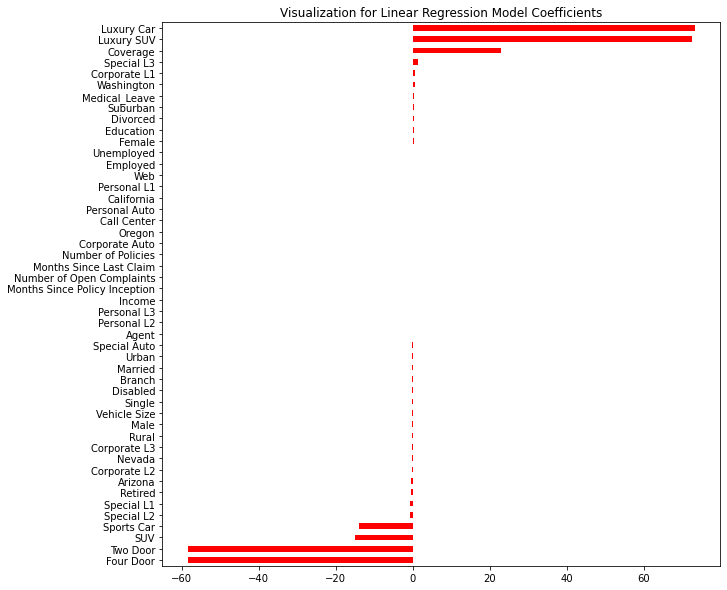

In [132]:
# Visualization for Linear Regression model.
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10,10))

lrGraph.sort_values().plot.barh(color='red')

plt.title('Visualization for Linear Regression Model Coefficients')

In [133]:
## Random Forest Model

In [134]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

# fitting random regression model

rfModel = rf.fit(x_train, y_train)

# predicting y_values using test dataset. 

y_pred_r = rfModel.predict(x_test)

mae_r = mean_absolute_error(y_test, y_pred_r)
mse_r = mean_squared_error(y_test, y_pred_r)
print(f'Random Forest Regression mean absolute error {mae_r}')
print(f"Random Forest Regression mean squared error {mse_r}")


Random Forest Regression mean absolute error 4.263581327498177
Random Forest Regression mean squared error 32.42470233406273


In [135]:
# feature importances from random forest model

importances = rfModel.feature_importances_
importances

array([4.75370415e-04, 4.18932261e-04, 4.78103246e-04, 3.23247565e-04,
       3.09870230e-04, 1.97164167e-01, 1.24084360e-03, 2.08068153e-04,
       2.04715199e-04, 1.99553932e-04, 2.32397057e-04, 1.21066396e-04,
       3.51502188e-04, 3.55052368e-04, 4.30368827e-03, 3.92744599e-04,
       3.51028937e-04, 4.26381929e-04, 4.29766406e-04, 3.73870056e-04,
       3.99002853e-04, 4.23999280e-03, 4.91102224e-03, 1.06686071e-03,
       2.19615390e-03, 3.05964701e-04, 2.47552511e-04, 1.16225595e-04,
       4.78762214e-04, 2.53376165e-04, 2.08533848e-04, 2.40938937e-04,
       4.32876013e-04, 6.58987184e-05, 5.67334304e-04, 5.72642548e-05,
       5.08720546e-05, 4.81246377e-04, 5.25559468e-04, 6.53515151e-04,
       4.15234535e-04, 1.58227834e-02, 1.95116096e-01, 8.28477134e-02,
       1.18855377e-02, 2.45290288e-01, 2.21812338e-01, 9.50685888e-04])

## interpreting random forest model. 

In [136]:
# interpreting random forest model. 

importances = rfModel.feature_importances_

# columns used in random forest model.
columns = x_train.columns

# series between columns and feature importances

rfGraph = pd.Series(importances, columns)

Text(0.5, 1.0, 'Visualization for Random Forest Regression Model Feature Importances')

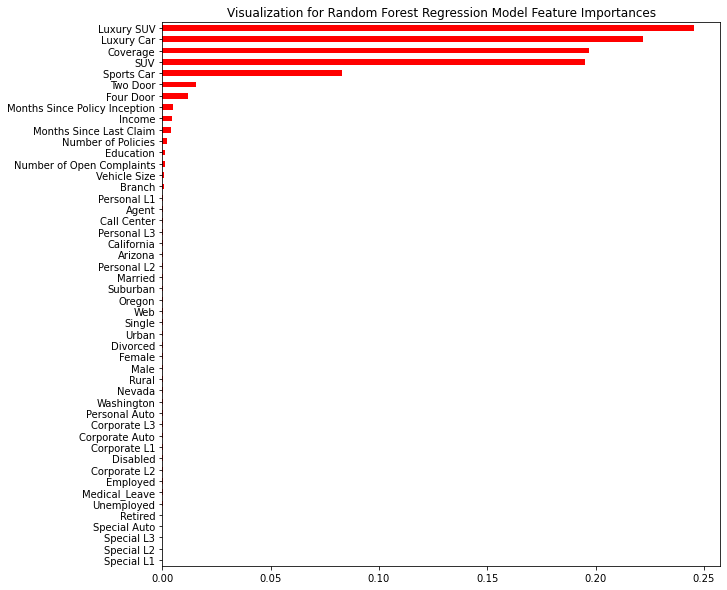

In [137]:
# Visualization for Random Regression model.

figure(figsize=(10,10))

rfGraph.sort_values().plot.barh(color='red')

plt.title('Visualization for Random Forest Regression Model Feature Importances')

## Objectives moving forward

* Hyper parameter tune random forest model to see If i can get a better and lower error score. 

* Build a linear regression model and random forest model for "customer lifetime value" objective. 

* Rebuild models for "customer lifetime value" prediction and "insurance premium" prediction using the best features. This will allow me to have less features when creating model interpretations and will allow me to have less features when we start building flask app

* Build different model interpretations for random forest models. 

* Refactor my code

* figure out how to build a flask app and put it online so that users can put in values for the important features we discovered and get a prediction for their insurance premium, and customer lifetime value. 

* Build a plotly app to put prediction life expectancy project online. 

### Try an idea. Re-do random forest model but with just top 10 features. 

In [138]:
x_train.head()

,Arizona,Oregon,California,Nevada,Washington,Coverage,Education,Employed,Medical_Leave,Unemployed,Disabled,Retired,Male,Female,Income,Urban,Rural,Suburban,Married,Divorced,Single,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Personal Auto,Corporate Auto,Special Auto,Personal L3,Corporate L3,Corporate L2,Corporate L1,Personal L2,Special L3,Personal L1,Special L2,Special L1,Call Center,Agent,Branch,Web,Two Door,SUV,Sports Car,Four Door,Luxury SUV,Luxury Car,Vehicle Size
5249,1,0,0,0,0,1,2,1,0,0,0,0,1,0,45515,1,0,0,1,0,0,14,33,0,9,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3
2077,1,0,0,0,0,1,2,1,0,0,0,0,1,0,82664,0,1,0,1,0,0,24,10,3,9,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2
6357,0,1,0,0,0,1,2,0,1,0,0,0,0,1,25370,0,0,1,1,0,0,10,77,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,3
8128,0,0,1,0,0,1,2,0,0,1,0,0,0,1,0,1,0,0,0,1,0,25,89,0,4,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2
6787,1,0,0,0,0,1,2,0,0,1,0,0,0,1,0,0,0,1,0,1,0,4,61,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2


In [145]:
rfGraph.sort_values(ascending=False)[:10]

Luxury SUV                       0.245290
Luxury Car                       0.221812
Coverage                         0.197164
SUV                              0.195116
Sports Car                       0.082848
Two Door                         0.015823
Four Door                        0.011886
Months Since Policy Inception    0.004911
Income                           0.004304
Months Since Last Claim          0.004240
dtype: float64

In [147]:
top_10_features = ['Luxury SUV', 'Luxury Car', 'Coverage', 
                   'SUV', 'Sports Car', 'Two Door', 'Four Door', 
                   'Months Since Policy Inception', 'Income', 
                   'Months Since Last Claim']

x_train2 = x_train[top_10_features]

x_test2 = x_test[top_10_features]

In [148]:
x_train2.head()

,Luxury SUV,Luxury Car,Coverage,SUV,Sports Car,Two Door,Four Door,Months Since Policy Inception,Income,Months Since Last Claim
5249,0,0,1,0,0,1,0,33,45515,14
2077,0,0,1,1,0,0,0,10,82664,24
6357,0,0,1,0,1,0,0,77,25370,10
8128,0,0,1,0,0,0,1,89,0,25
6787,0,0,1,0,0,0,1,61,0,4


In [149]:
x_test2.head()

,Luxury SUV,Luxury Car,Coverage,SUV,Sports Car,Two Door,Four Door,Months Since Policy Inception,Income,Months Since Last Claim
708,0,0,1,1,0,0,0,49,74585,1
47,0,0,1,0,0,1,0,10,23218,7
3995,0,0,2,0,0,1,0,38,94903,3
1513,0,0,2,0,0,0,1,27,77153,3
3686,0,0,1,0,0,0,1,14,23769,18


In [150]:

from sklearn.ensemble import RandomForestRegressor

rf2 = RandomForestRegressor(random_state=42)

# fitting random regression model

rfModel2 = rf.fit(x_train2, y_train)

# predicting y_values using test dataset. 

y_pred_r2 = rfModel2.predict(x_test2)

mae_r2 = mean_absolute_error(y_test, y_pred_r2)
mse_r2 = mean_squared_error(y_test, y_pred_r2)
print(f'Random Forest Regression mean absolute error {mae_r2}')
print(f"Random Forest Regression mean squared error {mse_r2}")


Random Forest Regression mean absolute error 4.277706077353233
Random Forest Regression mean squared error 35.400022110663166


## Hyper parameter tunning our random forest model to see if we can get lower error scores. 

Information on how to use grid search cv with a pipeline. https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html

In [156]:
# let's hyper parameter tune "Number of Estimators"
from sklearn.model_selection import GridSearchCV

gsModel = RandomForestRegressor(random_state=42)

params = {'n_estimators': [50, 100, 200, 300, 400, 500]}

search = GridSearchCV(estimator = gsModel,
                   param_grid = params,
                   n_jobs = -1)

In [161]:
# fitting grid search cv. 

search_model = search.fit(x_train2, y_train)

In [162]:
# best scores from the model. 

search_model.best_params_

{'n_estimators': 500}

In [163]:
y_pred_search = search_model.predict(x_test2)

In [164]:
mae_search = mean_absolute_error(y_test, y_pred_search)
mse_search = mean_squared_error(y_test, y_pred_search)
print(f'Grid Search CV mean absolute error {mae_search}')
print(f"Grid Search CV mean squared error {mse_search}")

Grid Search CV mean absolute error 4.268017609082708
Grid Search CV mean squared error 35.48236675784688


In [165]:
# let's hyper parameter tune "Number of Estimators"

from sklearn.model_selection import GridSearchCV

gsModel = RandomForestRegressor(random_state=42)

params = {'n_estimators': [500, 600, 700, 800, 900, 1000]}

search = GridSearchCV(estimator = gsModel,
                   param_grid = params,
                   n_jobs = -1)

# fitting grid search cv. 

search_model = search.fit(x_train2, y_train)

# best scores from the model. 

print(f'Best parameters: {search_model.best_params_}')

y_pred_search = search_model.predict(x_test2)

mae_search = mean_absolute_error(y_test, y_pred_search)
mse_search = mean_squared_error(y_test, y_pred_search)
print(f'Grid Search CV mean absolute error {mae_search}')
print(f"Grid Search CV mean squared error {mse_search}")

Best parameters: {'n_estimators': 700}
Grid Search CV mean absolute error 4.2653701723033555
Grid Search CV mean squared error 35.40022204502038


In [166]:
search_model

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [168]:
# let's hyper parameter tune "maximum depth of tree"

from sklearn.model_selection import GridSearchCV

gsModel = RandomForestRegressor(random_state=42,
                               n_estimators = 700)

params = {'max_depth': [5, 10, 15, 20, 25]}

search = GridSearchCV(estimator = gsModel,
                   param_grid = params,
                   n_jobs = -1)

# fitting grid search cv. 

search_model = search.fit(x_train2, y_train)

# best scores from the model. 

print(f'Best parameters: {search_model.best_params_}')

y_pred_search = search_model.predict(x_test2)

mae_search = mean_absolute_error(y_test, y_pred_search)
mse_search = mean_squared_error(y_test, y_pred_search)
print(f'Grid Search CV mean absolute error {mae_search}')
print(f"Grid Search CV mean squared error {mse_search}")

Best parameters: {'max_depth': 15}
Grid Search CV mean absolute error 4.4163540149659095
Grid Search CV mean squared error 34.2865473025331


In [169]:
# let's hyper parameter tune "maximum features to consider for each split"

from sklearn.model_selection import GridSearchCV

gsModel = RandomForestRegressor(random_state=42,
                               n_estimators = 700,
                               max_depth = 15)

params = {'max_features': [2, 4, 6, 8, 10]}

search = GridSearchCV(estimator = gsModel,
                   param_grid = params,
                   n_jobs = -1)

# fitting grid search cv. 

search_model = search.fit(x_train2, y_train)

# best scores from the model. 

print(f'Best parameters: {search_model.best_params_}')

y_pred_search = search_model.predict(x_test2)

mae_search = mean_absolute_error(y_test, y_pred_search)
mse_search = mean_squared_error(y_test, y_pred_search)
print(f'Grid Search CV mean absolute error {mae_search}')
print(f"Grid Search CV mean squared error {mse_search}")

Best parameters: {'max_features': 6}
Grid Search CV mean absolute error 4.392567094897731
Grid Search CV mean squared error 33.78198414957413


In [170]:
# let's hyper parameter tune "maximum depth of tree"

from sklearn.model_selection import GridSearchCV

gsModel = RandomForestRegressor(random_state=42,
                               n_estimators = 700)

params = {'max_depth': [15, 20, None]}

search = GridSearchCV(estimator = gsModel,
                   param_grid = params,
                   n_jobs = -1)

# fitting grid search cv. 

search_model = search.fit(x_train2, y_train)

# best scores from the model. 

print(f'Best parameters: {search_model.best_params_}')

y_pred_search = search_model.predict(x_test2)

mae_search = mean_absolute_error(y_test, y_pred_search)
mse_search = mean_squared_error(y_test, y_pred_search)
print(f'Grid Search CV mean absolute error {mae_search}')
print(f"Grid Search CV mean squared error {mse_search}")

Best parameters: {'max_depth': 15}
Grid Search CV mean absolute error 4.4163540149659095
Grid Search CV mean squared error 34.2865473025331


## Final Model for insurance premium using random forest model. 

In [171]:
model = RandomForestRegressor(random_state=42,
                               n_estimators = 700,
                               max_depth = 15,
                               max_features=6)

model.fit(x_train2, y_train)

y_pred_final = model.predict(x_test2)

mae_final = mean_absolute_error(y_test, y_pred_final)
mse_final = mean_squared_error(y_test, y_pred_final)
print(f'Final Random Forest Regressor mean absolute error {mae_final}')
print(f"Final Random Forest Regressor mean squared error {mse_final}")

Final Random Forest Regressor mean absolute error 4.392567094897731
Final Random Forest Regressor error 33.78198414957413


In [184]:
list(y_pred_final[:5])

[112.08888760955777,
 65.87372557243873,
 93.14615479378976,
 84.46429005200608,
 66.7224072165951]

In [179]:
list(y_test)[:5]

[106, 71, 94, 99, 69]

## Testing Gradient Boosting Model

In [185]:
from sklearn.ensemble import GradientBoostingRegressor

In [189]:
# fitting gradient boosting model on entire x train without extracting top 10 features

gbModel = GradientBoostingRegressor(random_state = 42)

gbModel.fit(x_train, y_train)

y_pred_gb= gbModel.predict(x_test)

mae_gb= mean_absolute_error(y_test, y_pred_gb)
mse_gb= mean_squared_error(y_test, y_pred_gb)
print(f'Gradient Boosting Regressor mean absolute error {mae_gb}')
print(f'Gradient Boosting Regressor mean squared error {mse_gb}')

Gradient Boosting Regressor mean absolute error 4.754646720490639
Gradient Boosting Regressor mean squared error 36.286013615529434


Text(0.5, 1.0, 'Visualization for Gradient Boosting Regression Model Feature Importances')

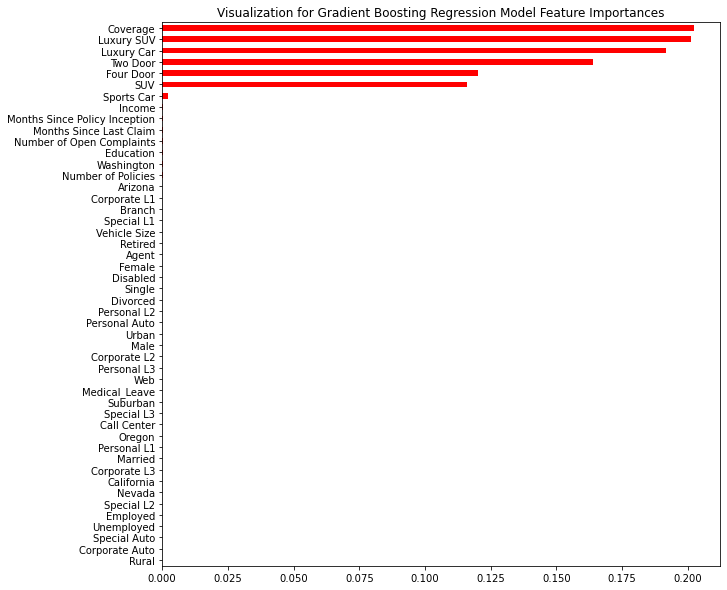

In [190]:
## Interpreting Gradient boosting model. 

gbImportances = gbModel.feature_importances_

# columns used in gradient boosting model.
columns = x_train.columns

# series between columns and feature importances

gbGraph = pd.Series(gbImportances, columns)

# Visualization for gradient boosting Regression model.

figure(figsize=(10,10))

gbGraph.sort_values().plot.barh(color='red')

plt.title('Visualization for Gradient Boosting Regression Model Feature Importances')

In [194]:
# fitting gradient boosting model on top 10 features from x-train

gbModel2 = GradientBoostingRegressor(random_state = 42)

gbModel2.fit(x_train2, y_train)

y_pred_gb2= gbModel2.predict(x_test2)

mae_gb2= mean_absolute_error(y_test, y_pred_gb2)
mse_gb2= mean_squared_error(y_test, y_pred_gb2)
print(f'Gradient Boosting Regressor mean absolute error {mae_gb2}')
print(f'Gradient Boosting Regressor mean squared error {mse_gb2}')

Gradient Boosting Regressor mean absolute error 4.739913464047273
Gradient Boosting Regressor mean squared error 36.168345435425344


In [195]:
x_train2.head()

,Luxury SUV,Luxury Car,Coverage,SUV,Sports Car,Two Door,Four Door,Months Since Policy Inception,Income,Months Since Last Claim
5249,0,0,1,0,0,1,0,33,45515,14
2077,0,0,1,1,0,0,0,10,82664,24
6357,0,0,1,0,1,0,0,77,25370,10
8128,0,0,1,0,0,0,1,89,0,25
6787,0,0,1,0,0,0,1,61,0,4


In [196]:
# seting what coverage means. 
x_train2['Coverage'].describe()

count    6598.000000
mean        1.475447
std         0.651431
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: Coverage, dtype: float64

In [ ]:
# testing what prediction will be using dummy data. 

In [207]:
test_data = [[0, 0, 2, 0, 1, 0, 1, 20, 50000, 10]]

In [208]:
model.predict(test_data)

array([108.55416519])

Defining final features to use to predict insurance premium. MAYBE in the future just use type of cars as the insurance premium predictor.

## Shapley Plot for Best performing model. 

In [210]:
import shap

In [ ]:
model = RandomForestRegressor(random_state=42,
                               n_estimators = 700,
                               max_depth = 15,
                               max_features=6)

model.fit(x_train2, y_train)

y_pred_final = model.predict(x_test2)

mae_final = mean_absolute_error(y_test, y_pred_final)
mse_final = mean_squared_error(y_test, y_pred_final)
print(f'Final Random Forest Regressor mean absolute error {mae_final}')
print(f"Final Random Forest Regressor mean squared error {mse_final}")

In [214]:
# function to do shapley plots. 

def shapley(x_train, y_train, x_test, row_number=0):
    
    model = RandomForestRegressor(random_state=42,
                               n_estimators = 700,
                               max_depth = 15,
                               max_features=6)
    
    model.fit(x_train, y_train)

    # defining what row to examine in the shapley plot
    row = x_test.iloc[[row_number]]

    # predicting
    pred = model.predict(row)

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(row)

    feature_names = row.columns
    feature_values = row.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

    # printing the result

    """result = f'{pred[0]:.1f} is the predicted Insurance Premium. \n\n'
    result += f'Starting from baseline of ${explainer.expected_value:.1f} \n\n'
    result += shaps.to_string()
    print(result)"""

    shap.initjs()

    return shap.force_plot(
      base_value = explainer.expected_value,
      shap_values = shap_values,
      features=row)



In [218]:
x_test2.head()

,Luxury SUV,Luxury Car,Coverage,SUV,Sports Car,Two Door,Four Door,Months Since Policy Inception,Income,Months Since Last Claim
708,0,0,1,1,0,0,0,49,74585,1
47,0,0,1,0,0,1,0,10,23218,7
3995,0,0,2,0,0,1,0,38,94903,3
1513,0,0,2,0,0,0,1,27,77153,3
3686,0,0,1,0,0,0,1,14,23769,18


In [217]:
x_test2.iloc[0]

Luxury SUV                           0
Luxury Car                           0
Coverage                             1
SUV                                  1
Sports Car                           0
Two Door                             0
Four Door                            0
Months Since Policy Inception       49
Income                           74585
Months Since Last Claim              1
Name: 708, dtype: int64

In [215]:
shapley(x_train2, y_train, x_test2)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [220]:
x_test2.iloc[20]

Luxury SUV                           0
Luxury Car                           0
Coverage                             1
SUV                                  0
Sports Car                           0
Two Door                             0
Four Door                            1
Months Since Policy Inception       63
Income                           24910
Months Since Last Claim              7
Name: 6848, dtype: int64

In [219]:
shapley(x_train2, y_train, x_test2, row_number=20)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Objectives moving forward

    Build a linear regression model and random forest model for "customer lifetime value" objective.

    Rebuild models for "customer lifetime value" prediction and "insurance premium" prediction using the best features. This will allow me to have less features when creating model interpretations and will allow me to have less features when we start building flask app

    Build different model interpretations for random forest models.

    Refactor my code

    figure out how to build a flask app and put it online so that users can put in values for the important features we discovered and get a prediction for their insurance premium, and customer lifetime value.

    Build a plotly app to put prediction life expectancy project online.



# Now working on predicting "Customer Lifetime Value"

In [ ]:
# define new y_target, and new x_target. 
# then do a baseline model
# then do a linear regression model
# linear regression model explanation
# then do a random forest model
# random forest model explanation. 

In [221]:
# define x and y values for customer lifetime value

# keeping x_train and x_test the same. 

x_train_ltv = x_train
x_test_ltv = x_test

# defining y_variables

y_train_ltv = train_encoded['Customer Lifetime Value']
y_test_ltv = test_encoded['Customer Lifetime Value']

In [247]:
len(y_test_ltv)

1371

In [223]:
# mean baseline = random guess. 
# If I were to guess what the lifetime value of the customer is, 
# this will be my guess. 

mean_ltv = y_train_ltv.mean()
round(mean_ltv, 2)

7954.82

In [251]:
error_ltv = mean_ltv - y_train_ltv

# mean absolute error of our mean baseline

mean_ltv_absolute_error = error_ltv.abs().mean()
print(f'By guessing, our customer lifetime value would be ${round(mean_ltv, 2)} \nand we would be off by ${round(mean_ltv_absolute_error, 2)}')

By guessing, our customer lifetime value would be $7954.82 
and we would be off by $4345.01


In [254]:
# linear regression model for customer lifetime value

lr_ltv = LinearRegression()

# fitting linear regression model

lr_ltvModel = lr_ltv.fit(x_train_ltv, y_train_ltv)

# predicting y_values using test dataset. 

y_pred_ltv = lr_ltvModel.predict(x_test_ltv)

mae_ltv = mean_absolute_error(y_test_ltv, y_pred_ltv)
mse_ltv = mean_squared_error(y_test_ltv, y_pred_ltv)
print(f'Linear Regression mean absolute error {mae_ltv}')
print(f"Linear Regression mean squared error {mse_ltv}")

Linear Regression mean absolute error 4106.079334721215
Linear Regression mean squared error 46342633.63154268


Text(0.5, 1.0, 'Visualization for Linear Regression Model Coefficients')

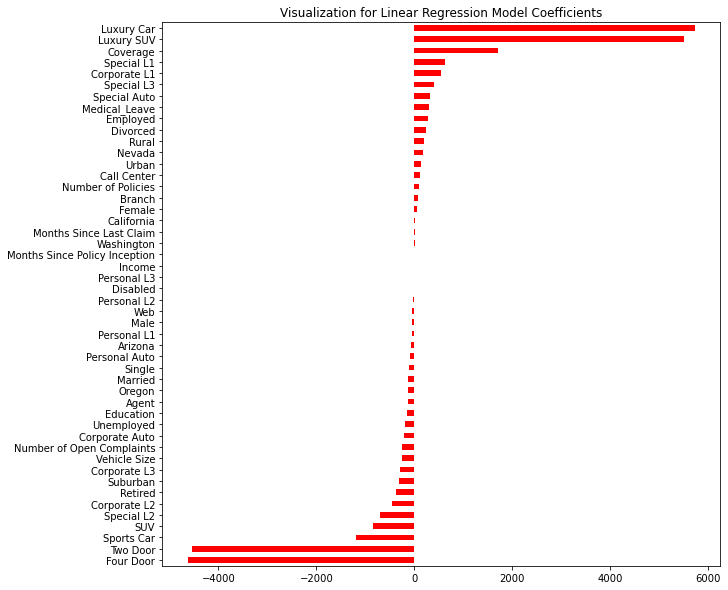

In [255]:
# visualizing coefficients for customer lifetime value using linar regression

coeff_ltv = lr_ltvModel.coef_

# plotting the coefficients from linear regression model.
columns = x_train_ltv.columns

# series between columns and coefficients

lr_ltvGraph = pd.Series(coeff_ltv, columns)

# Visualization for Linear Regression model.
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10,10))

lr_ltvGraph.sort_values().plot.barh(color='red')

plt.title('Visualization for Linear Regression Model Coefficients')

In [256]:
# build a random forest model for customer lifetime value. 

from sklearn.ensemble import RandomForestRegressor

rf_ltv = RandomForestRegressor(random_state=42)

# fitting random regression model

rf_ltvModel = rf_ltv.fit(x_train_ltv, y_train_ltv)

# predicting y_values using test dataset. 

y_pred_r_ltv = rf_ltvModel.predict(x_test_ltv)

mae_r_ltv = mean_absolute_error(y_test_ltv, y_pred_r_ltv)
mse_r_ltv = mean_squared_error(y_test_ltv, y_pred_r_ltv)
print(f'Random Forest Regression mean absolute error {mae_r_ltv}')
print(f"Random Forest Regression mean squared error {mse_r_ltv}")

Random Forest Regression mean absolute error 1674.0142810357406
Random Forest Regression mean squared error 16583977.897622708


Text(0.5, 1.0, 'Visualization for Random Forest Regression Model Feature Importances')

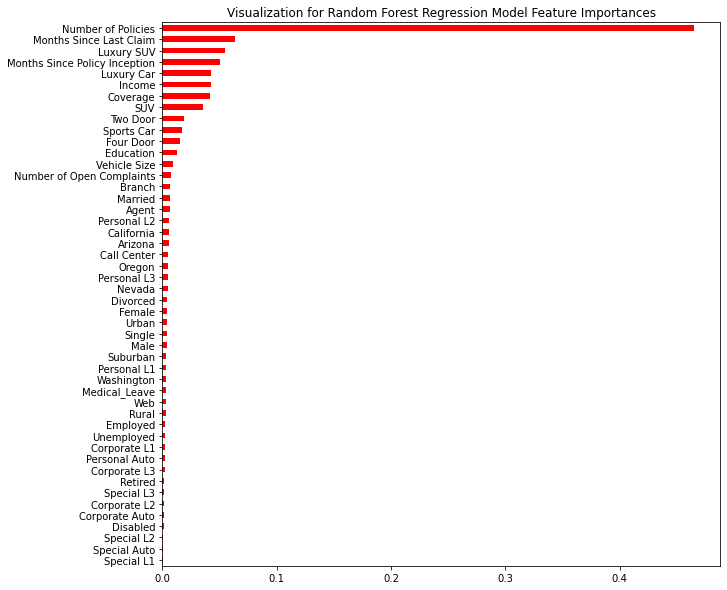

In [257]:
# visualize which features contribed to random forest prediction. 

# interpreting random forest model. 

importances_ltv = rf_ltvModel.feature_importances_

# columns used in random forest model.
columns = x_train.columns

# series between columns and feature importances

rf_ltvGraph = pd.Series(importances_ltv, columns)

# Visualization for Random Regression model.

figure(figsize=(10,10))

rf_ltvGraph.sort_values().plot.barh(color='red')

plt.title('Visualization for Random Forest Regression Model Feature Importances')

In [258]:
shapley(x_train_ltv, y_train_ltv, x_test_ltv)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


# Objectives moving forward

* Select top 10 features that contribute to customer lifetime value
* do hyper parameter tuning on random forest for customer lifetime value
* try gradient boosting model for customer lifetime value
* maybe try feature engineering where I engineer a new feature that basically says how many TOTAL cars the customer has. 
* run models again using the engineered feature. 
* Create model explanations using pdp box plots and permutation importances. 
* Refactor the code and clean up everything. 
* Build the flask app for this project
* Build plotly app for life expectancy project & Insurance premium project. 